## Yiğit Yavuz YILDIZ - 090210334
## Enes KESKİN - 090200337

# Project Title: Comprehensive Climate Impact Prediction Model (CCIPM)

The climate change is global problem that touches upon all the aspects of human life and the
ecosystem stability. The project will be an interdisciplinary collaboration to anticipate the climate
change outcomes on agricultural yields, the health of people and the resilience of the economy. The
CCIPM utilises the latest in machine learning technology, along with a vast pool of information, to
create intelligent reporting that feeds policy makers working towards sustainable development
plans.
The devastating impact of climate change on farming, health, and business operations has much
broader consequences compared to the extreme weather conditions, rising sea levels, and different
types of precipitation. The precise predictive models which give the analysis of the multisided
impacts of the region from a complex perspective are inevitably the basis of the effective mitigation
and adaptation strategies. The project will integrate clime complex data with socio-economic
indicators to depict the likely future based on various climate scenario, which will play an important
role for the planners, policymakers, and the communities.

Library Importation

In [132]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from joblib import dump
from joblib import load
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Data Loading Stage

## Loading Climate Change Data

Our data is yearly and city-wise, so we will calculate the average and combine the dataframes to find the average change around the world.

SOURCE : climateknowledgeportal.worldbank.org

| Code  | Label                         | Unit | Description                                                                                                                                                           |
|-------|-------------------------------|------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| cdd   | Maximum number of consecutive dry days | days | The maximum length of a dry spell, computed sequentially for the entire time series, then taking the maximum value during each month in the data period (a dry day is defined as any day in which the daily accumulated precipitation < 1 mm) |
| cdd65 | Cooling Degree Days (ref-65°F) | degF | The cumulative number of degrees that the daily average temperature over a given period is above a specified threshold (here 65°F), which is a measurement designed to quantify the demand for energy needed to cool a building. |
| csdi  | Cold Spell Duration Index      | days | This variable represents the number of days in a sequence of at least six consecutive days during which the value of the daily minimum temperature is less than the 10th percentile of daily minimum temperature calculated for a five-day window centered on each calendar day, using all data for the given calendar day. |
| cwd   | Max Number of Consecutive Wet Days | days | This series measures the maximum length of a wet spell, computed sequentially for the entire time series, then taking the maximum value during each month in the data period (a wet day is defined as any day in which the daily accumulated precipitation ≥ 1 mm). |
| fd    | Number of Frost Days (Tmin < 0°C) | days | The average aggregated number of days where the daily minimum temperature is < 0°C (= Frost Days) in the data period. A negative value indicates a reduction in the number of Frost Days. |
| gsl   | Growing Season Length          | days | The annual number of days between the first span of at least six consecutive days in which the daily mean temperature > 5°C and the first span in the second half of the year of at least six consecutive days in which the daily mean temperature < 5°C. |
| gslend | Growing Season Length End      | days | Growing Season Length End |
| gslstart | Growing Season Length Start  | days | Growing Season Length Start |
| hd30  | Number of Hot Days (Tmax > 30°C) | days | The number of days with daily maximum temperature > 30°C that occurred during the aggregation period. |
| hd35  | Number of Hot Days (Tmax > 35°C) | days | The number of days with daily maximum temperature > 35°C that occurred during the aggregation period. |
| hd40  | Number of Hot Days (Tmax > 40°C) | days | The number of days with daily maximum temperature > 40°C that occurred during the aggregation period. |
| hd42  | Number of Hot Days (Tmax > 42°C) | days | This series is comprised of the number of days with daily maximum temperature > 42°C that occurred during the aggregation period. |
| hd45  | Number of Hot Days (Tmax > 45°C) | days | The number of days with daily maximum temperature > 45°C that occurred during the aggregation period. |
| hd50  | Number of Hot Days (Tmax > 50°C) | days | The number of days with daily maximum temperature > 50°C that occurred during the aggregation period. |

| *Code*                  | *Description*                                                                                                         | *Unit*   | *Details*                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------|------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| hdcat                     | Hot Day Heat Risk Categorization                                                                                        | risk factor | Categorization of the occurrence of days above four thresholds for designated Heat Risk Variable. Hot Day Risk Categorization includes, daily maximum temperature: 30°C, 35°C, 40°C, and 45°C. If at least 0.5 days surpassed the highest threshold, then the highest category is given, reflecting that "at minimum one day of the year experienced the highest heat level". Risk Factor Categorization: 0-4 represents Low - Extreme Risk.                                                                                                                                                      |
| hdd65                     | Heating degree days (ref:65°F)                                                                                          | degF       | The cumulative number of degrees that the daily average temperature over a given period is below a specified threshold (here 65°F), which is a measurement designed to quantify the demand for energy needed to warm a building.                                                                                                                                                                                                                                                                                                                                                                         |
| hdtr                      | Number of Hot Days and Tropical Nights                                                                                  | risk factor | This series is comprised of the number of days with daily maximum temperature > 30°C that occurred during the aggregation period.                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| hdtrhi                    | Number of Hot Days and Tropical Nights with Humidity                                                                    | risk factor | This series is comprised of the number of days with daily maximum temperature > 30°C that occurred during the aggregation period.                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| hdtrhipoppdensitycat      | Temperature and Humidity-Based Heat + Population Risk Categorization                                                    | risk factor | Temperature and Humidity-Based Heat + Population Risk Categorization is calculated to account for both climate conditions and high population densities. Categorization was established relative to the highest threshold: daily maximum temperature: 30°C, 35°C, 40°C, and 45°C; nighttime minimum temperature: 20°C, 23°C, 26°C, and 29°C; and heat index: 35°C, 37°C, 39°C, and 41°C, leading to categories 0, 1, 2, 3, 4. If at least 0.5 days surpassed the highest threshold, then the highest categorization is given. Areas with extreme heat but no population are considered less ‘risky’ for a country, than areas with only high to very high heat conditions but with high population density. |
| hdtrpoppdensitycat        | Temperature-Based Heat + Population Risk Categorization                                                                 | risk factor | Temperature-Based Heat + Population Risk Categorization is calculated to account for both climate conditions and high population densities. Categorization was established relative to the highest threshold: daily maximum temperature: 30°C, 35°C, 40°C, and 45°C and nighttime minimum temperature: 20°C, 23°C, 26°C, and 29°C, leading to categories 0, 1, 2, 3, 4. If at least 0.5 days surpassed the highest threshold, then the highest categorization is given. Areas with extreme heat but no population are considered less ‘risky’ for a country, than areas with only high to very high heat conditions but with high population density.             |
| hi35                      | Number of Days with Heat Index > 35°C                                                                                   | days       | The number of days where the Heat Index surpasses 35°C over the aggregation period. The Heat Index is a measure of apparent temperature that includes the influence of atmospheric moisture. High temperatures with high moisture lead to high Heat Index.                                                                                                                                                                                                                                                                                                                                                |
| hi37                      | Number of Days with Heat Index > 37°C                                                                                   | days       | The number of days where the Heat Index surpasses 37°C over the aggregation period. The Heat Index is a measure of apparent temperature that includes the influence of atmospheric moisture. High temperatures with high moisture lead to high Heat Index.                                                                                                                                                                                                                                                                                                                                                |
| hi39                      | Number of Days with Heat Index > 39°C                                                                                   | days       | The number of days where the Heat Index surpasses 39°C over the aggregation period. The Heat Index is a measure of apparent temperature that includes the influence of atmospheric moisture. High temperatures with high moisture lead to high Heat Index.                                                                                                                                                                                                                                                                                                                                                |
| hi41                      | Number of Days with Heat Index > 41°C                                                                                   | days       | The number of days where the Heat Index surpasses 41°C over the aggregation period. The Heat Index is a measure of apparent temperature that includes the influence of atmospheric moisture. High temperatures with high moisture lead to high Heat Index.                                                                                                                                                                                                                                                                                                                                                |

| *Code*          | *Description*                                          | *Unit*              | *Details*                                                                                                                                                                                                                                                                                                                                                                                                  |
|-------------------|----------------------------------------------------------|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| hicat             | Heat Index Heat Risk Categorization                      | risk factor           | Categorization of the occurrence of days above four thresholds for designated Heat Risk Variable. Heat Index Risk Categorization includes, heat index: 35°C, 37°C, 39°C, and 41°C. If at least 0.5 days surpassed the highest threshold, then the highest category is given, reflecting that "at minimum one day of the year experienced the highest heat level". Risk Factor Categorization: 0-4 represents Low - Extreme Risk. |
| hurs              | Relative Humidity                                        | %                     | The relative humidity in a surface of 2 meters.                                                                                                                                                                                                                                                                                                                                                               |
| id                | Number of Ice Days (Tmax < 0°C)                          | days                  | This variable represents the average aggregated number of days where the daily maximum temperature is < 0°C in the data period.                                                                                                                                                                                                                                                                               |
| popcount          | Population Count                                         | population            | Population Count                                                                                                                                                                                                                                                                                                                                                                                             |
| popdensity        | Population Density                                       | population_density    | Population Density                                                                                                                                                                                                                                                                                                                                                                                           |
| pov190            | Percentage of Population below $1.90/day                 | % of population       | Poverty as a percent of population below a given poverty classification: $1.90/day, as per World Bank definitions.                                                                                                                                                                                                                                                                                           |
| pov320            | Percentage of Population below $3.20/day                 | % of population       | Poverty as a percent of population below a given poverty classification: $3.20/day, as per World Bank definitions.                                                                                                                                                                                                                                                                                           |
| pov550            | Percentage of Population below $5.50/day                 | % of population       | Poverty as a percent of population below a given poverty classification: $5.50/day, as per World Bank definitions.                                                                                                                                                                                                                                                                                           |
| pr                | Precipitation                                            | mm                    | Aggregated accumulated precipitation.                                                                                                                                                                                                                                                                                                                                                                        |
| prpercent         | Precipitation Percent Change                             | %                     | Projected percent change in total precipitation; anomaly only.                                                                                                                                                                                                                                                                                                                                               |
| r20mm             | Number of Days with Precipitation >20mm                  | days                  | The number of heavy precipitation days during the aggregation period. A heavy precipitation day is defined as any day in which the daily accumulated precipitation is ≥ 20 mm.                                                                                                                                                                                                                                |
| r50mm             | Number of Days with Precipitation >50mm                  | days                  | The number of very heavy precipitation days during the aggregation period. A very heavy precipitation day for r50mm is defined as any day in which the daily accumulated precipitation is ≥ 50 mm.                                                                                                                                                                                                            |
| r95ptot           | Precipitation amount during wettest days                 | mm                    | The accumulated precipitation amount during the 5% wettest days over the data period.                                                                                                                                                                                                                                                                                                                         |
| rx1day            | Average Largest 1-Day Precipitation                      | mm                    | The average highest precipitation amount in a 1-day period during each month in the data period.                                                                                                                                                                                                                                                                                                              |
| rx5day            | Average Largest 5-Day Cumulative Precipitation           | mm                    | The average highest precipitation amount over a consecutive 5-day period during each month in the data period.                                                                                                                                                                                                                                                                                                |
| rxmonth           | Average Largest Monthly Cumulative Precipitation         | mm                    | The highest precipitation amount in a month period during each year in the data period.                                                                                                                                                                                                                                                                                                                       |

| *Code*    | *Description*                               | *Unit*       | *Details*                                                                                                                                                                                                                                                                                                                                                                   |
|-------------|-----------------------------------------------|----------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| sd          | Number of Summer Days (Tmax > 25°C)           | days           | The number of days where the daily maximum temperature is > 25°C in the aggregation period. A positive value indicates an increase in the number of Summer Days.                                                                                                                                                                                                             |
| tas         | Average Mean Surface Air Temperature          | °C             | Average mean temperature over the aggregation period                                                                                                                                                                                                                                                                                                                          |
| tasmax      | Average Maximum Surface Air Temperature       | °C             | Average maximum temperature over the aggregation period                                                                                                                                                                                                                                                                                                                       |
| tasmin      | Average Minimum Surface Air Temperature       | °C             | Average minimum temperature over the aggregation period                                                                                                                                                                                                                                                                                                                       |
| td          | Number of Frost Days (Tmin<0°C)               | °C             | Number of Frost Days (Tmin<0°C)                                                                                                                                                                                                                                                                                                                                               |
| tnn         | Minimum of Daily Min-Temperature              | °C             | The single-day minimum value of the daily minimum temperatures over the aggregated data period.                                                                                                                                                                                                                                                                               |
| tr          | Number of Tropical Nights (T-min > 20°C)      | days           | The number of days where the daily minimum temperature remained > 20°C over the aggregation period.                                                                                                                                                                                                                                                                           |
| tr23        | Number of Tropical Nights (T-min > 23°C)      | days           | The number of days where the daily minimum temperature remained > 23°C over the aggregation period.                                                                                                                                                                                                                                                                           |
| tr26        | Number of Tropical Nights (T-min > 26°C)      | days           | The number of days where the daily minimum temperature remained > 26°C over the aggregation period.                                                                                                                                                                                                                                                                           |
| tr29        | Number of Tropical Nights (T-min > 29°C)      | days           | The number of days where the daily minimum temperature remained > 29°C over the aggregation period.                                                                                                                                                                                                                                                                           |
| tr32        | Number of Tropical Nights (T-min > 32°C)      | days           | The number of days where the daily minimum temperature remained > 32°C over the aggregation period.                                                                                                                                                                                                                                                                           |
| trcat       | Tropical Night Heat Risk Categorization       | risk factor    | Categorization of the occurrence of days above four thresholds for designated Heat Risk Variable. Tropical Night Risk Categorization includes, nighttime minimum temperature: 20°C, 23°C, 26°C, and 29°C. If at least 0.5 day surpassed the highest threshold, then the highest category is given, reflecting that “at minimum one day of the year experienced the highest heat level”. Risk Factor Categorization: 0-4 represents Low - Extreme Risk. |
| tx84rr      | Excess Mortality                              | population     |                                                                                                                                                                                                                                                                                                                                                                              |
| txx         | Maximum of Daily Max-Temperature              | °C             | The single-day maximum value of the daily maximum temperatures over the aggregated data period.                                                                                                                                                                                                                                                                               |
| wsdi        | Warm Spell Duration Index                     | days           | The number of days in a sequence of at least six consecutive days during which the value of the daily maximum temperature is greater than the 90th percentile of daily maximum temperature calculated for a five-day window centered on each calendar day, using all data for the given calendar day-pentad                                                                   |

This script is designed to process multiple Excel files containing climate data, compute averages for relevant columns, and merge them into a single dataframe. Initially, it extracts the filename from the file path to use as a column name in the resulting dataframe. It then loads the data from each Excel file, specifically focusing on a sheet named 'all'. Columns 'code' and 'name' are removed to prepare for computing the average of the remaining data. The averages are calculated, and the dataframe is updated to only show the year part of the 'Year-Month' column. Each processed dataframe is stored in a dictionary using the filename as the key. In the merging phase, the script combines all these individual dataframes by the 'Year' column, ensuring that each year's data from different files aligns properly. After merging, it calculates the growing season length (GSL) as the difference between the ending and starting dates of the growing season. Finally, the consolidated dataframe is exported to a CSV file, creating a comprehensive dataset ready for further analysis.

In [98]:

def load_and_process_files(file_paths):
    dataframes = {}

    for name, path in file_paths.items():
        
        file_name = os.path.splitext(os.path.basename(path))[0]

        df = pd.read_excel(path, sheet_name='all')

        average_df = df.drop(columns=['code', 'name']).mean().reset_index()

        average_df.columns = ['Year-Month', file_name]  

        average_df['Year'] = average_df['Year-Month'].apply(lambda x: x.split('-')[0])
        average_df.drop(columns=['Year-Month'],axis=1,inplace=True)

        dataframes[name] = average_df

    return dataframes

def merge_dataframes(dataframes):
    merged_df = None

    for name, df in dataframes.items():
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on='Year', how='left')

    return merged_df

file_paths = {
    'cdd': 'unprocessed-datas/climate-data/cdd.xlsx',
    'cwd': 'unprocessed-datas/climate-data/cwd.xlsx',
    'fd': 'unprocessed-datas/climate-data/fd.xlsx',
    'gslend': 'unprocessed-datas/climate-data/gslend.xlsx',
    'gslstart': 'unprocessed-datas/climate-data/gslstart.xlsx',
    'hd30': 'unprocessed-datas/climate-data/hd30.xlsx',
    'hi35': 'unprocessed-datas/climate-data/hi35.xlsx',
    'hurs': 'unprocessed-datas/climate-data/hurs.xlsx',
    'id': 'unprocessed-datas/climate-data/id.xlsx',
    'pr': 'unprocessed-datas/climate-data/pr.xlsx',
    'r20mm': 'unprocessed-datas/climate-data/r20mm.xlsx',
    'rx1day': 'unprocessed-datas/climate-data/rx1day.xlsx',
    'tas': 'unprocessed-datas/climate-data/tas.xlsx',
    'tasmax': 'unprocessed-datas/climate-data/tasmax.xlsx',
    'tasmin': 'unprocessed-datas/climate-data/tasmin.xlsx',
    'tnn': 'unprocessed-datas/climate-data/tnn.xlsx',
    'txx': 'unprocessed-datas/climate-data/txx.xlsx',
    'wsdi': 'unprocessed-datas/climate-data/wsdi.xlsx'
}

dataframes = load_and_process_files(file_paths)

merged_df = merge_dataframes(dataframes)

merged_df['gsl'] = merged_df['gslend'] - merged_df['gslstart']

merged_df.to_csv('processed-datas/climate.csv',index=False)

## Climate Data Visualisation
### Plot average, max, and min temperature over time


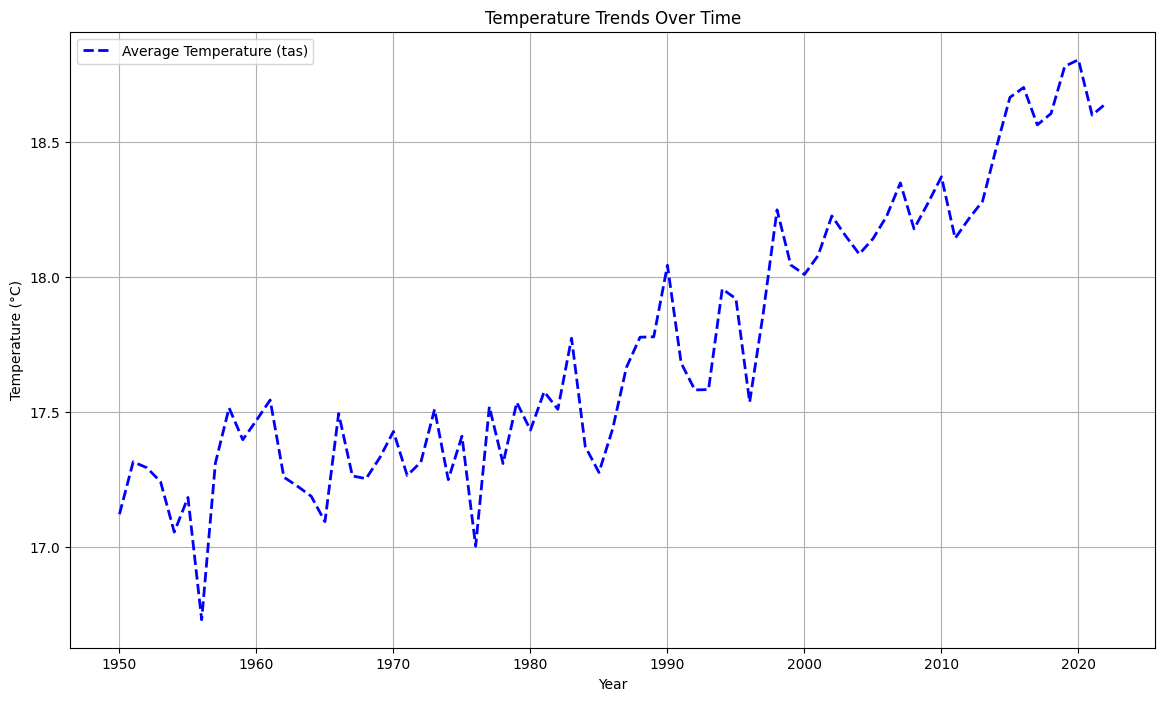

In [99]:
climate_data = pd.read_csv('processed-datas/climate.csv')

plt.figure(figsize=(14, 8))
plt.plot(climate_data['Year'], climate_data['tas'], label='Average Temperature (tas)', color='blue', linewidth=2, linestyle='--')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()


### Plot Growing Season Length (GSL) over time


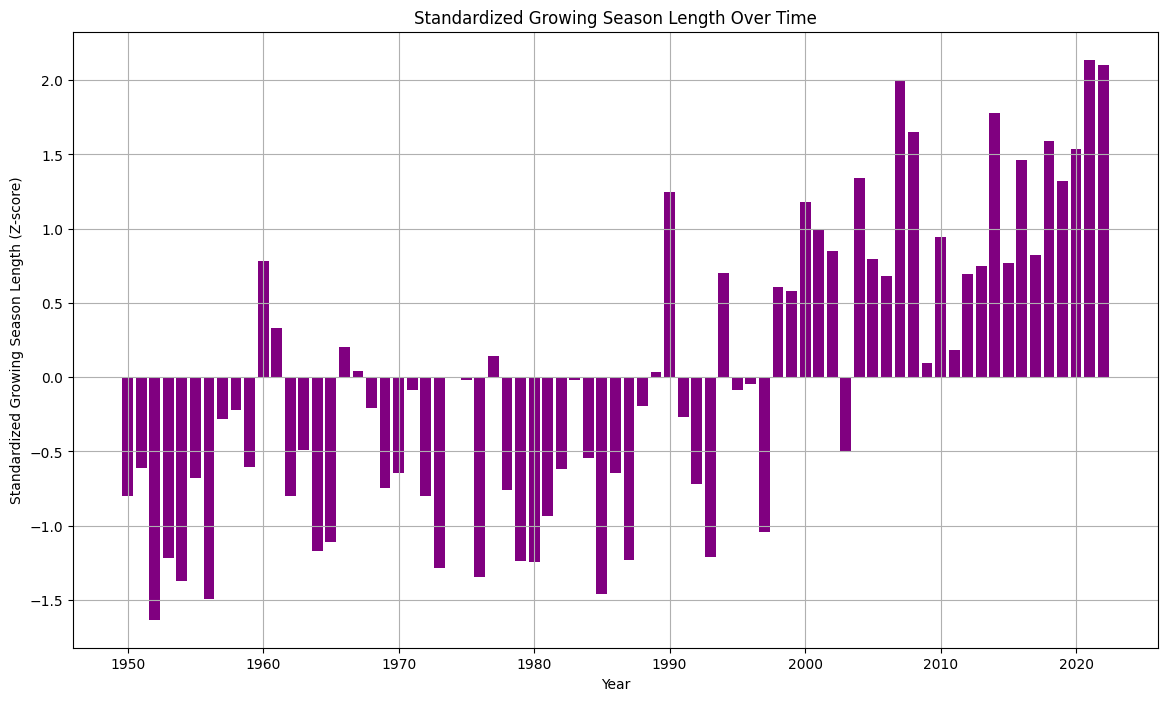

In [100]:
mean_gsl = climate_data['gsl'].mean()
std_gsl = climate_data['gsl'].std()


plt.figure(figsize=(14, 8))
plt.bar(climate_data['Year'], (climate_data['gsl'] - mean_gsl) / std_gsl, color='purple')
plt.xlabel('Year')
plt.ylabel('Standardized Growing Season Length (Z-score)')
plt.title('Standardized Growing Season Length Over Time')
plt.grid(True)
plt.show()


### Scatter plot with regression line for temperature and precipitation


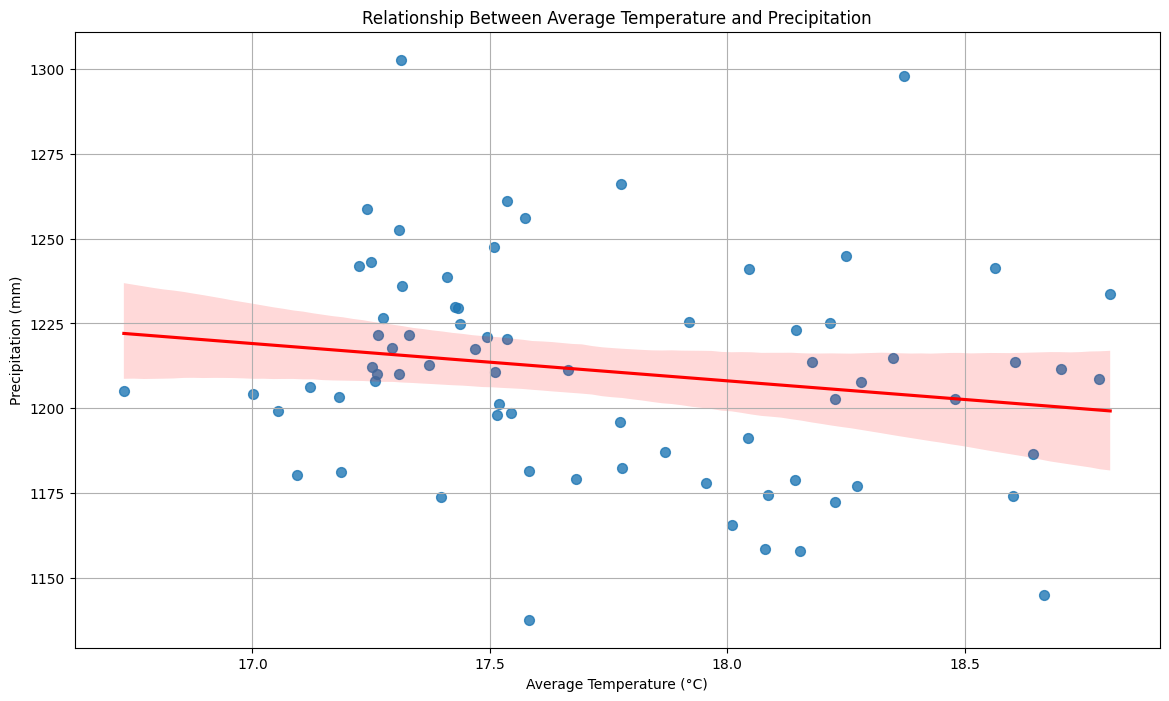

In [101]:
plt.figure(figsize=(14, 8))
sns.regplot(x='tas', y='pr', data=climate_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.title('Relationship Between Average Temperature and Precipitation')
plt.grid(True)
plt.show()


### Time series plot for number of hot days, frost days, and consecutive dry days


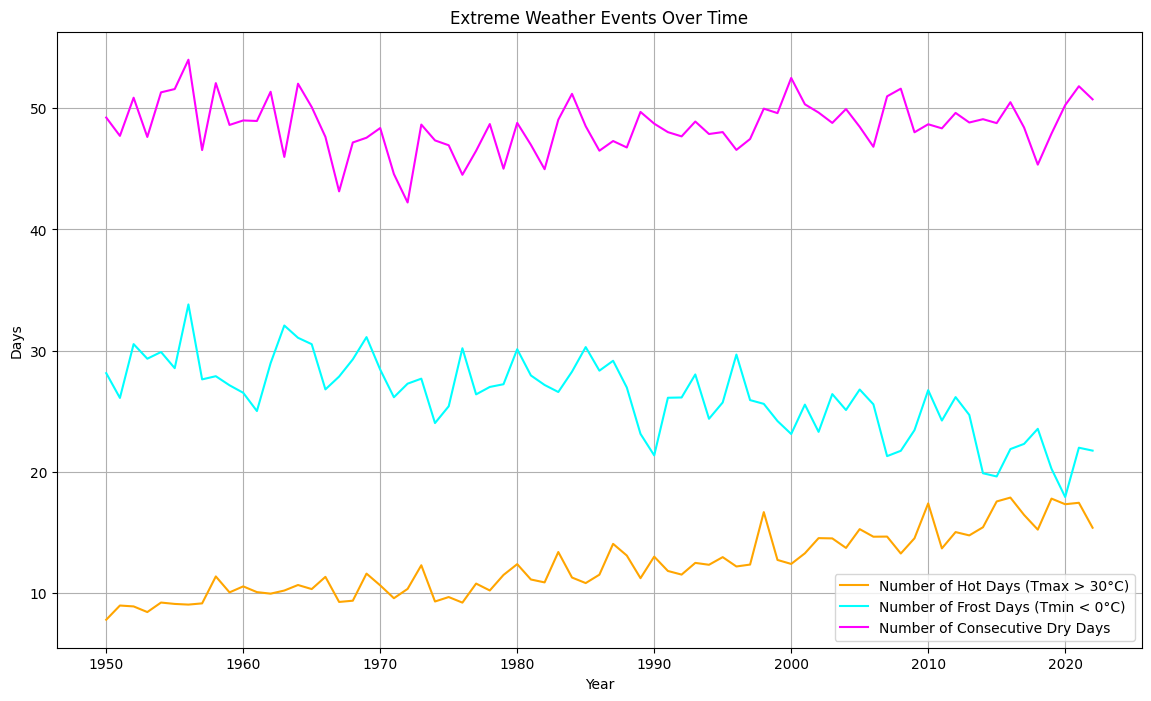

In [102]:
plt.figure(figsize=(14, 8))
plt.plot(climate_data['Year'], climate_data['hd30'], label='Number of Hot Days (Tmax > 30°C)', color='orange')
plt.plot(climate_data['Year'], climate_data['fd'], label='Number of Frost Days (Tmin < 0°C)', color='cyan')
plt.plot(climate_data['Year'], climate_data['cdd'], label='Number of Consecutive Dry Days', color='magenta')
plt.xlabel('Year')
plt.ylabel('Days')
plt.title('Extreme Weather Events Over Time')
plt.legend()
plt.grid(True)
plt.show()


### 1. Dual-Axis Plot for Key Climate Variables

#### i) Plot Cooling Degree Days (CDD) and Growing Season Length (GSL) Over Time with a dual-axis plot
#### ii) Plot Consecutive Wet Days (CWD) and Heatwave Days (HD30) Over Time with a dual-axis plot


##### Plot Cooling Degree Days (CDD) and Growing Season Length (GSL) Over Time with a dual-axis plot


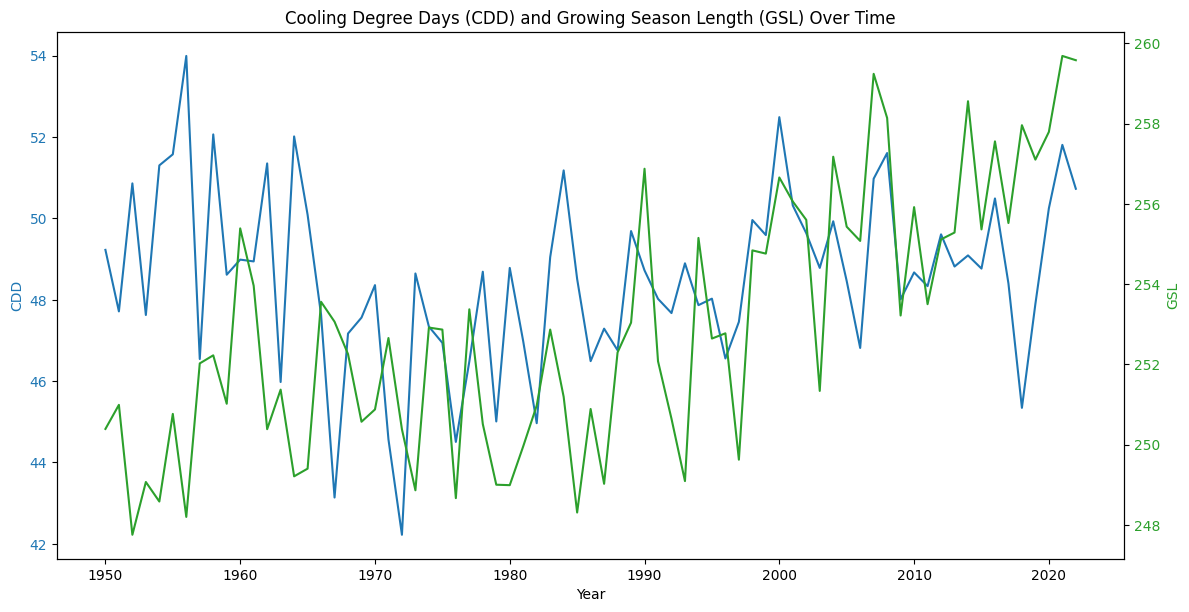

In [103]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('CDD', color=color)
ax1.plot(climate_data['Year'], climate_data['cdd'], color=color, label='CDD')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('GSL', color=color) 
ax2.plot(climate_data['Year'], climate_data['gsl'], color=color, label='GSL')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Cooling Degree Days (CDD) and Growing Season Length (GSL) Over Time')
plt.show()



##### Plot Consecutive Wet Days (CWD) and Heatwave Days (HD30) Over Time with a dual-axis plot


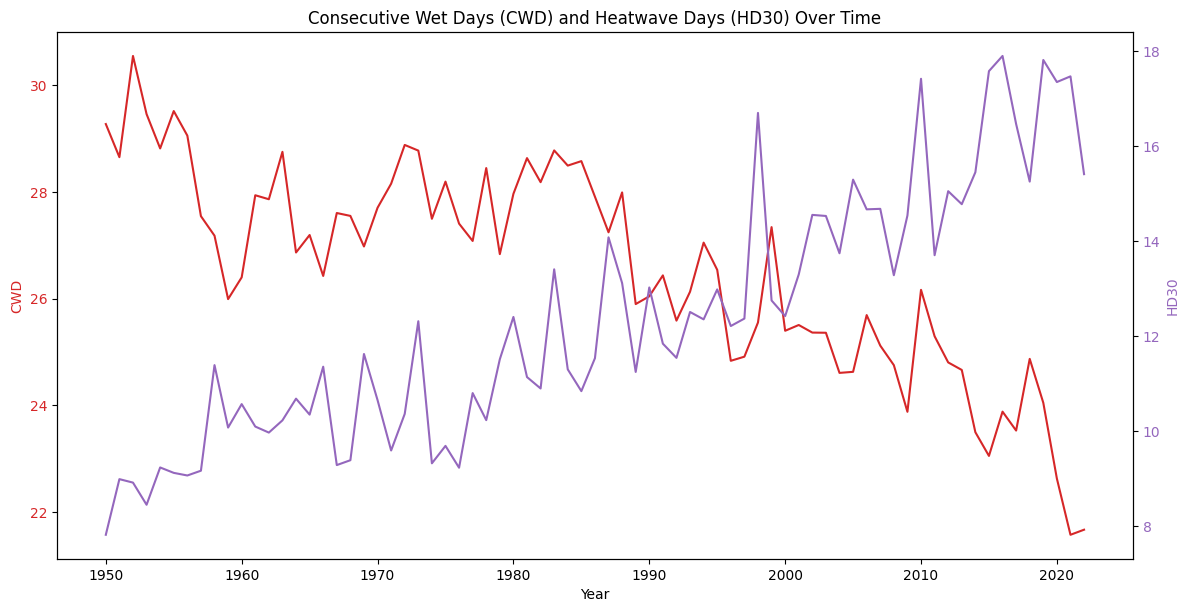

In [104]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('CWD', color=color)
ax1.plot(climate_data['Year'], climate_data['cwd'], color=color, label='CWD')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('HD30', color=color) 
ax2.plot(climate_data['Year'], climate_data['hd30'], color=color, label='HD30')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Consecutive Wet Days (CWD) and Heatwave Days (HD30) Over Time')
plt.show()


### 2. Regression Plots for Temperature and Precipitation Metrics


#### Plot Cooling Degree Days (CDD) and Number of Hot Days (HD30) with regression line


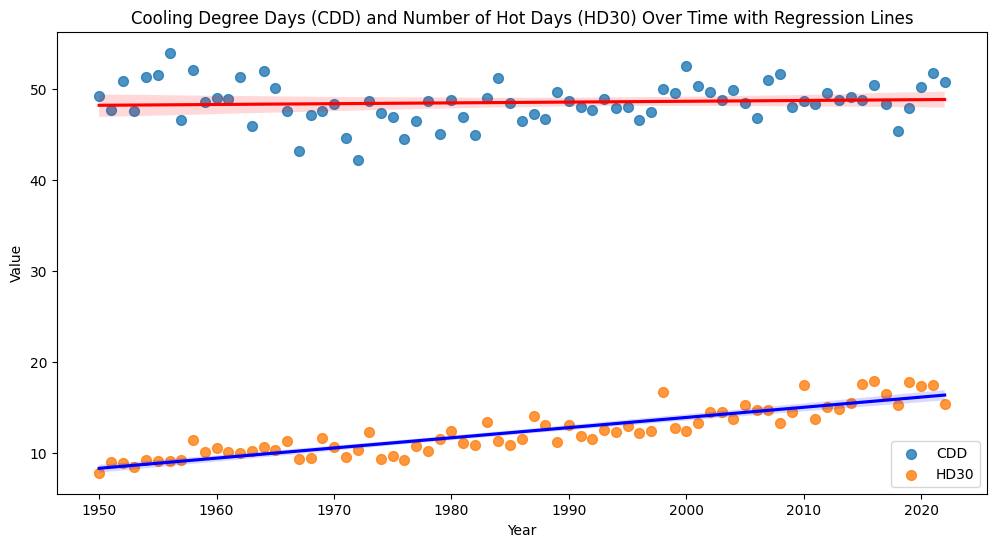

In [105]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Year', y='cdd', data=climate_data, label='CDD', scatter_kws={'s': 50}, line_kws={'color': 'red'})
sns.regplot(x='Year', y='hd30', data=climate_data, label='HD30', scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.title('Cooling Degree Days (CDD) and Number of Hot Days (HD30) Over Time with Regression Lines')
plt.show()


We need to decrase the number of features. Lets create correlation matrix and use PCA

After analysis notes : As seen from the graph and the cumulative explanatory variance ratios, several principal components explain a large portion of the total variance. For example:

The first 2 components explain 74.5% of the data set.
The first 5 components explain 91.2% of the data set.
The first 10 components explain 99.0% of the data set.
In general, to reduce the complexity of the model and ensure a meaningful representation, achieving 90% or more of the explanatory variance is usually sufficient. In this case, it would be appropriate to use 5 or 6 main components.

Let's apply PCA by selecting the first 5 principal components and reduce the size of the data set.

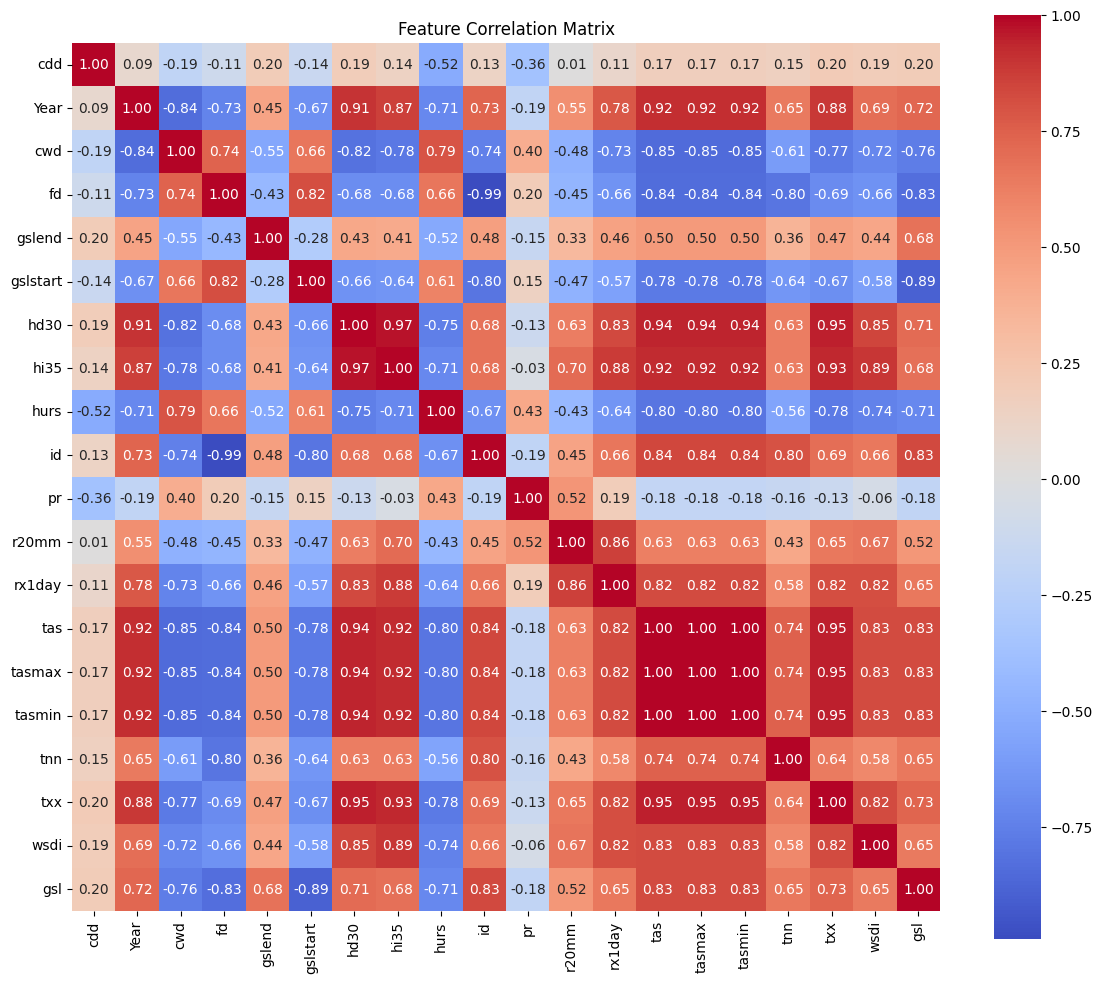

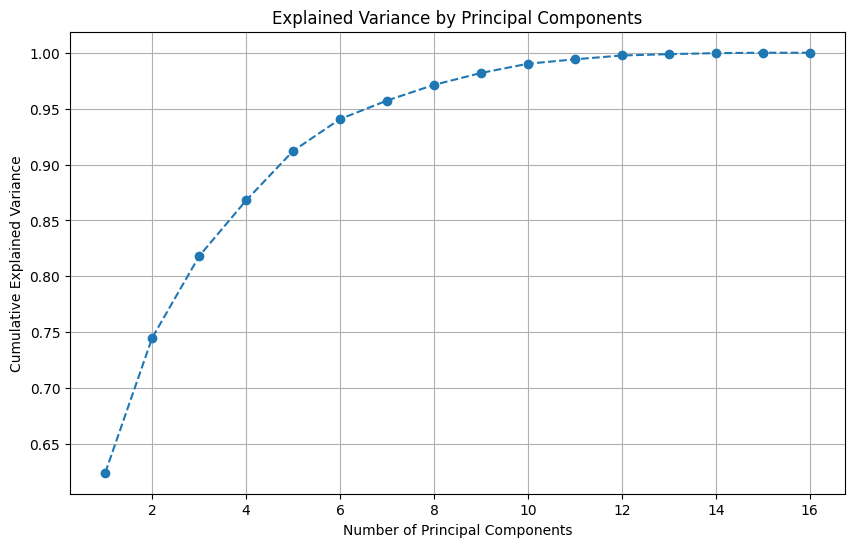

In [106]:
file_path = 'processed-datas/climate.csv'
data = pd.read_csv(file_path)

correlation_matrix = data.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Feature Correlation Matrix")
plt.show()

reduced_data = data.drop(columns=['tasmax', 'tasmin', 'hi35'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(reduced_data.drop(columns=['Year']))

pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

n_components = 5
pca = PCA(n_components=n_components)
pca_transformed_data = pca.fit_transform(scaled_data)

pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=pca_transformed_data, columns=pca_columns)
pca_df['Year'] = reduced_data['Year']

output_file_path = 'processed-datas/pca_transformed_climate.csv'
pca_df.to_csv(output_file_path, index=False)

## Greenhouse Gases Emissions Data

Our data is yearly and country-wise, so we will calculate the average and combine the dataframes to find the average change around the world.

SOURCE : ourworldindata.org

In [107]:
file_path = 'unprocessed-datas/ghgemissiondata/ghg-emissions.csv'
data = pd.read_csv(file_path)

years = data.columns[3:]

global_emissions = pd.DataFrame(data[years].sum(numeric_only=True))
global_emissions.reset_index(inplace=True)
global_emissions.columns=['Year','GHG_Emission']

global_emissions.to_csv('processed-datas/global_ghg.csv',index=False)

## Emission Data Visualization

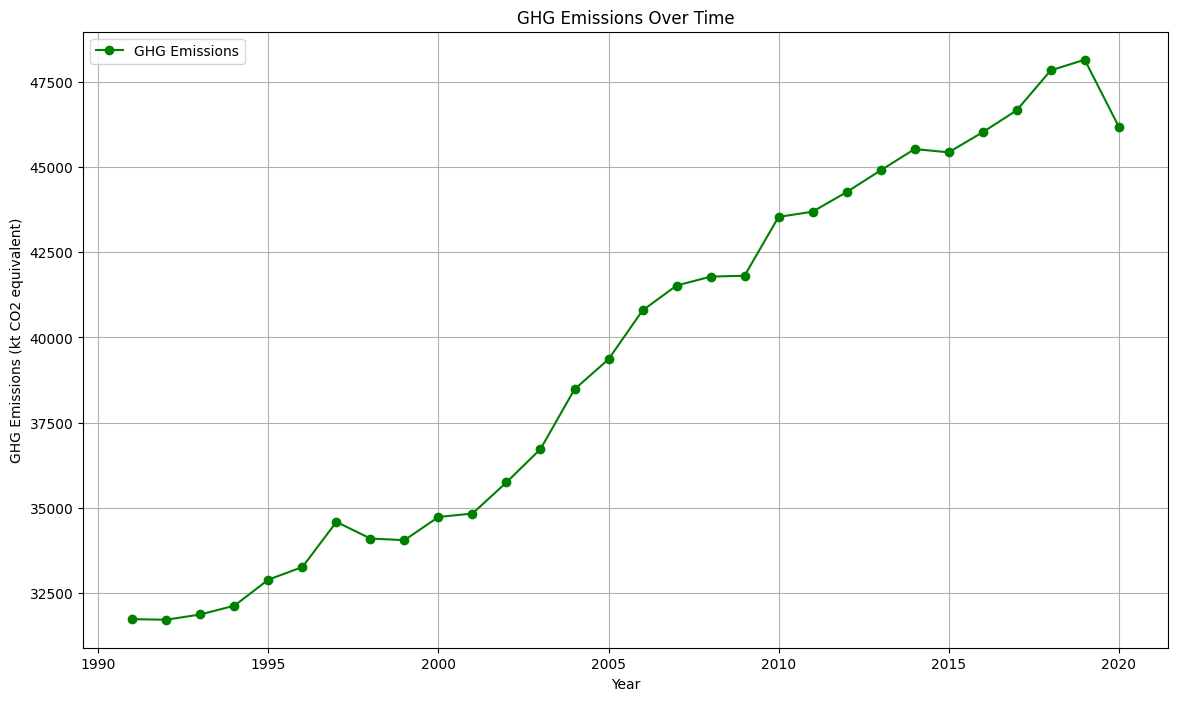

In [108]:
emissions_data = pd.read_csv('processed-datas/global_ghg.csv')

plt.figure(figsize=(14, 8))
plt.plot(emissions_data['Year'], emissions_data['GHG_Emission'], marker='o', color='green', label='GHG Emissions')
plt.xlabel('Year')
plt.ylabel('GHG Emissions (kt CO2 equivalent)')
plt.title('GHG Emissions Over Time')
plt.legend()
plt.grid(True)
plt.show()


## Health Data

We examine Lyme incidents and heath related deaths.


SOURCE : www.epa.gov

This script processes two CSV files containing health-related data—one tracking heat-related deaths and another tracking Lyme disease incidence. Each file is read while skipping the first five rows, which typically contain metadata or headers that are not necessary for analysis. After loading the data, the columns are renamed to more descriptive names to enhance clarity and facilitate easier data manipulation. For the heat deaths dataset, it retains only the columns relevant to underlying heat deaths, discarding others to focus the analysis.

To ensure data integrity, the script removes any rows with missing data in the 'Year' column from both datasets, a crucial step for time-series analysis. It also filters out non-numeric values from the 'Year' column to maintain consistency, as numeric years are essential for time alignment in subsequent operations. After cleaning, the 'Year' column is converted to an integer data type, preparing it for merging.

The two datasets are then merged based on the 'Year' column, aligning data by year to combine the health impacts of heat and Lyme disease into a single comprehensive view. This merged dataframe is then saved to a CSV file, providing a clean, combined dataset ready for further analysis or reporting.

In [109]:
heat_deaths_df = pd.read_csv('unprocessed-datas/health-data/heat-deaths_fig-1.csv', skiprows=5)
lyme_df = pd.read_csv('unprocessed-datas/health-data/lyme_fig-1.csv', skiprows=5)

heat_deaths_df.columns = ['Year', 'Heat_Deaths_Underlying', 'Heat_Deaths_Underlying_and_Contributing']
lyme_df.columns = ['Year', 'Lyme_Incidence']

heat_deaths_df = heat_deaths_df[['Year', 'Heat_Deaths_Underlying']]

heat_deaths_df = heat_deaths_df.dropna(subset=['Year'])
lyme_df = lyme_df.dropna(subset=['Year'])

heat_deaths_df = heat_deaths_df[pd.to_numeric(heat_deaths_df['Year'], errors='coerce').notnull()]
lyme_df = lyme_df[pd.to_numeric(lyme_df['Year'], errors='coerce').notnull()]

heat_deaths_df['Year'] = heat_deaths_df['Year'].astype(int)
lyme_df['Year'] = lyme_df['Year'].astype(int)

merged_df = pd.merge(heat_deaths_df, lyme_df, on='Year', how='left')

merged_df.to_csv('processed-datas/health_data.csv', index=False)

## Health Data Visualization

# Plot Heat-Related Deaths over time


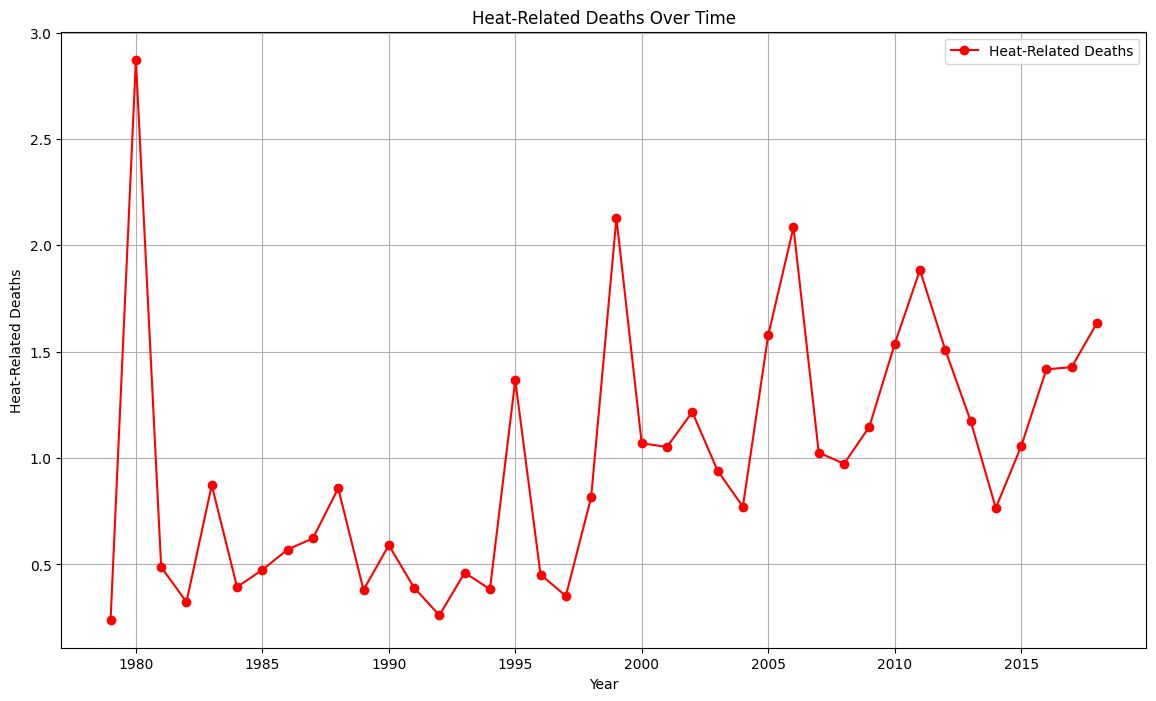

In [110]:
health_data = pd.read_csv('processed-datas/health_data.csv')

plt.figure(figsize=(14, 8))
plt.plot(health_data['Year'], health_data['Heat_Deaths_Underlying'], marker='o', color='red', label='Heat-Related Deaths')
plt.xlabel('Year')
plt.ylabel('Heat-Related Deaths')
plt.title('Heat-Related Deaths Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot Lyme Disease Incidence over time


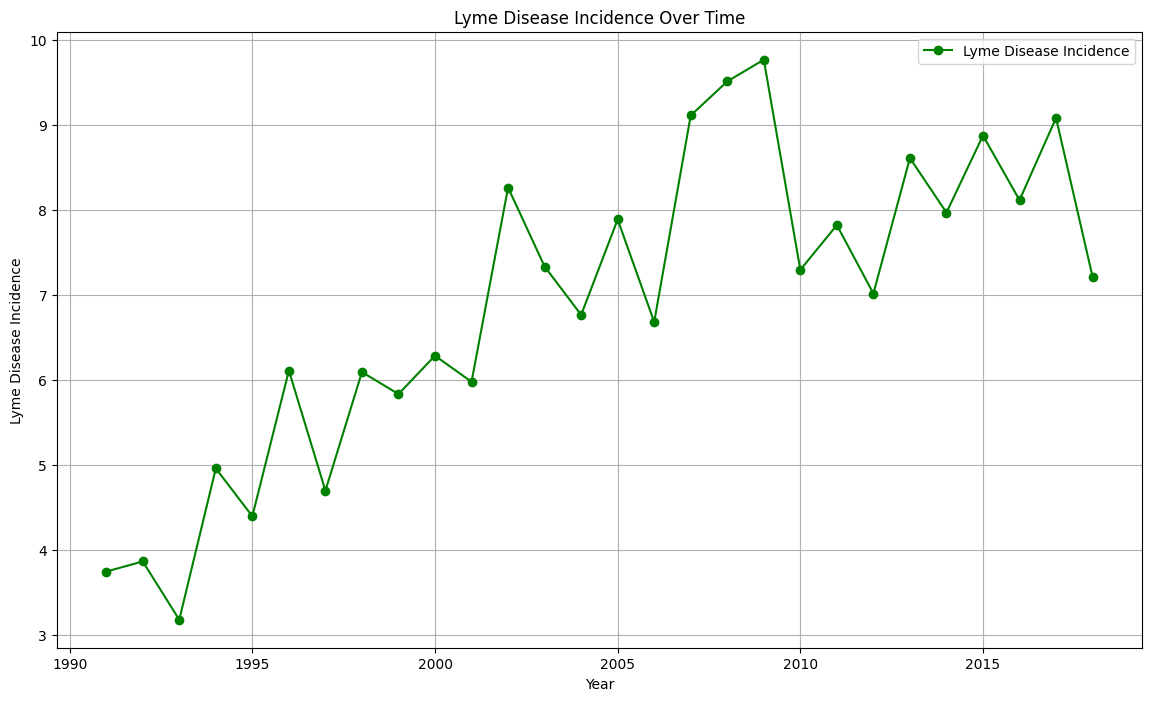

In [111]:
plt.figure(figsize=(14, 8))
plt.plot(health_data['Year'], health_data['Lyme_Incidence'], marker='o', color='green', label='Lyme Disease Incidence')
plt.xlabel('Year')
plt.ylabel('Lyme Disease Incidence')
plt.title('Lyme Disease Incidence Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Economic Data

SOURCE: www.eea.europa.eu , www.epa.gov

This script processes economic data related to energy usage and climate-related economic losses within the EU, sourced from both CSV and Excel files. It starts by loading a CSV file, skipping the initial six rows which typically contain non-essential information. Simultaneously, an Excel file is loaded, skipping the first eight rows to bypass preliminary headers and metadata, ensuring the data extracted starts directly from the relevant content.

The Excel data undergoes a renaming process where the first column is labeled as 'Type', followed by geographical labels and codes, with subsequent columns representing years from 1980 to 2022. The dataset is then filtered to focus solely on the economic data pertinent to the EU, identified by the geographical code 'EU27_2020'. This data is transposed to align years as rows, facilitating a time-series analysis and merging with other datasets.

The transposed data is cleaned to remove non-numeric entries in the 'Year' column, ensuring that all entries are suitable for chronological analysis. The 'Year' column is converted to integers to maintain consistency in data type, especially for merging purposes.

Concurrently, the CSV data is modified by dropping columns that are not required for the specific analysis focus, in this case, removing data related to cooling degree days. The cleaned CSV data and the transposed Excel data are then merged based on the 'Year' column, ensuring that each year's data from different sources aligns correctly. This merged dataset is then saved to a new CSV file, providing a consolidated resource ready for detailed economic analysis or reporting. The final output includes well-defined variables such as 'Summer electricity use per capita' and 'Million Loss From Climate', directly linking energy consumption to economic outcomes from climate impacts.








In [112]:
csv_data = pd.read_csv('unprocessed-datas/economic-data/residential-energy_fig-1.csv', skiprows=6)

excel_data_cleaned = pd.read_excel('unprocessed-datas/economic-data/eu-sdg-13-40_1980-2022_v02_r00.xlsx', sheet_name='Data', skiprows=8)

excel_data_cleaned.columns = ['Type', 'Geo_Label', 'Geo_Code'] + list(range(1980, 2023))

excel_data_eu = excel_data_cleaned[excel_data_cleaned['Geo_Code'].isin(['EU27_2020'])]

excel_data_eu = excel_data_eu.set_index('Geo_Code').transpose().reset_index()
excel_data_eu = excel_data_eu.rename(columns={'index': 'Year', 'EU27_2020': 'Million_Loss_From_Climate'})

excel_data_eu = excel_data_eu[pd.to_numeric(excel_data_eu['Year'], errors='coerce').notnull()]

excel_data_eu['Year'] = excel_data_eu['Year'].astype(int)

csv_data = csv_data.drop(columns=['Summer cooling degree days (contiguous 48 states)'])

merged_data = pd.merge(csv_data, excel_data_eu, on='Year', how='left')
merged_data = merged_data.rename(columns={'Summer electricity use per capita (50 states)':'Summer electricity use per capita'})

output_file_path = 'processed-datas/economic_data.csv'
merged_data.to_csv(output_file_path, index=False)

## Economic Data Visualization

### Plot Summer Electricity Use Per Capita over time

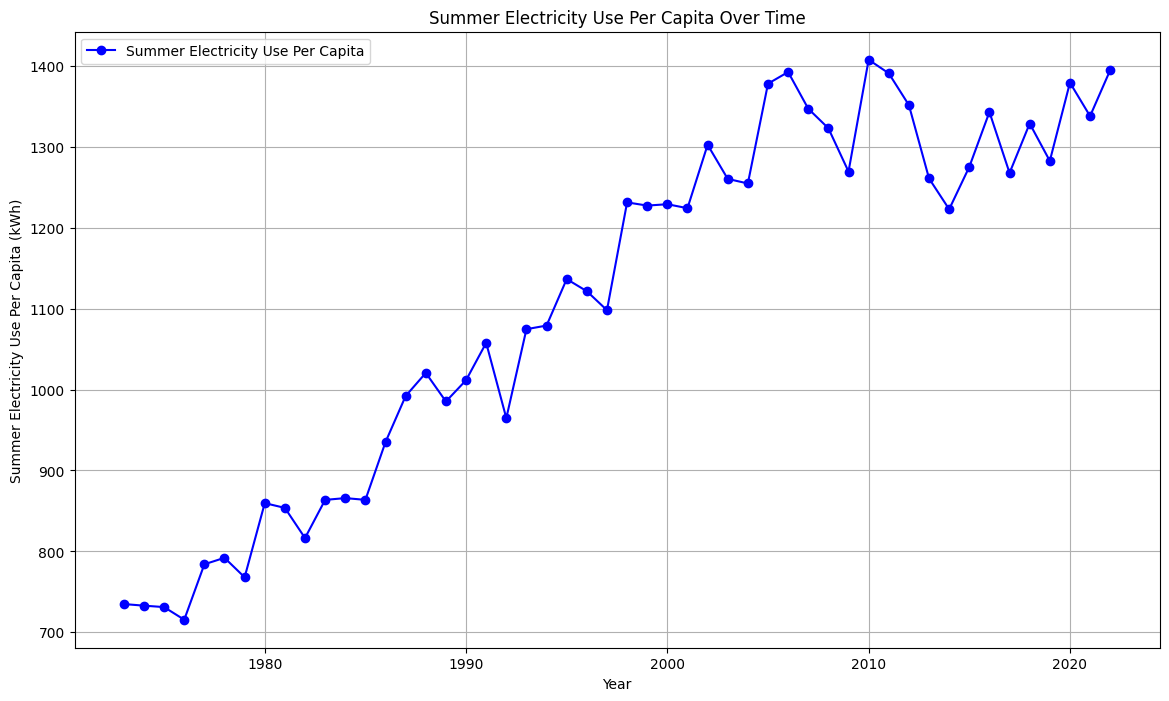

In [113]:
economic_data = pd.read_csv('processed-datas/economic_data.csv')

plt.figure(figsize=(14, 8))
plt.plot(economic_data['Year'], economic_data['Summer electricity use per capita'], marker='o', color='blue', label='Summer Electricity Use Per Capita')
plt.xlabel('Year')
plt.ylabel('Summer Electricity Use Per Capita (kWh)')
plt.title('Summer Electricity Use Per Capita Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Plot Economic Losses from Climate Impacts over time


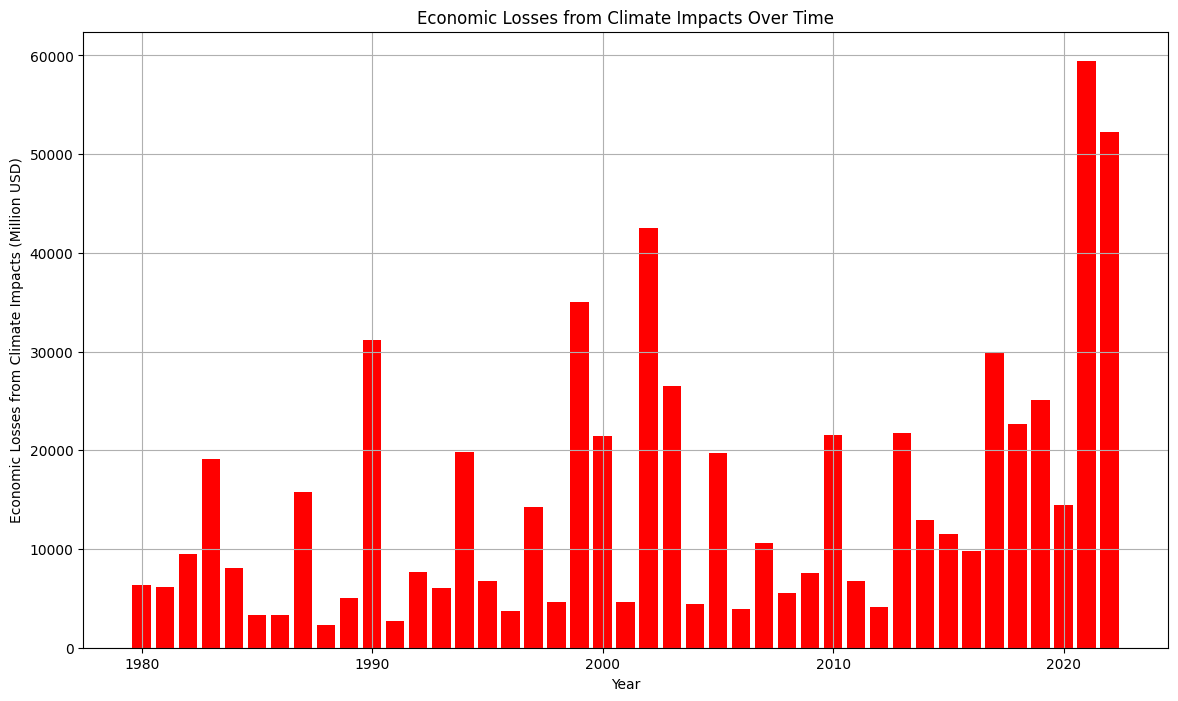

In [114]:
plt.figure(figsize=(14, 8))
plt.bar(economic_data['Year'], economic_data['Million_Loss_From_Climate'], color='red')
plt.xlabel('Year')
plt.ylabel('Economic Losses from Climate Impacts (Million USD)')
plt.title('Economic Losses from Climate Impacts Over Time')
plt.grid(True)
plt.show()

## Agricultural Data

SOURCE : www.fao.org

This script handles the processing of multiple agricultural datasets covering diverse aspects such as land use, land cover, crops and livestock, agricultural production, and production indices. Initially, it loads each dataset from a CSV file, ensuring proper encoding to handle any special characters. Each dataset is then trimmed to retain only relevant columns that include 'Year', 'Area', 'Domain', 'Element', 'Item', 'Unit', and 'Value', streamlining the data for focused analysis.

The next step involves concatenating these datasets into a single dataframe to create a unified source of agricultural data. This merged data is further refined to filter out only essential rows based on specific 'Element' types such as 'Area per capita', 'Area harvested', 'Production', 'Yield', and 'Gross Production Value (current thousand US$)', which are crucial for assessing agricultural performance.

A more specific subset of this data, focusing on world totals, is then created by dropping all columns except 'Year', 'Element', 'Unit', and 'Value'. This subset is grouped by 'Year', 'Element', and 'Unit' and aggregated to calculate the sum of values for each group, providing a comprehensive overview of global agricultural metrics over time.

Further, the script pivots this data to transform it into a more readable format where each row represents a year, and each column represents a different agricultural metric, with their corresponding values summarized. The pivoted data frame is flattened to ensure that column names are clean and understandable, facilitating easier data visualization or further analysis.

Finally, this processed and structured data is saved to a CSV file, compiling a robust dataset that encapsulates significant agricultural trends and values across multiple dimensions, ready for in-depth analysis or reporting.

In [115]:
# Load datasets
landuse_data = pd.read_csv('unprocessed-datas/faostat_data/FAOSTAT_data_en_landuse.csv', encoding='utf-8')
landcover_data = pd.read_csv('unprocessed-datas/faostat_data/FAOSTAT_data_en_landcover.csv', encoding='utf-8')
crops_livestock_data = pd.read_csv('unprocessed-datas/faostat_data/FAOSTAT_data_en_5-18-2024.csv', encoding='utf-8')
agricultural_production_data = pd.read_csv('unprocessed-datas/faostat_data/FAOSTAT_data_en_5-18-2024 (1).csv', encoding='utf-8')
production_indices_data = pd.read_csv('unprocessed-datas/faostat_data/FAOSTAT_data_en_5-18-2024 (2).csv', encoding='utf-8')

# Select relevant columns
landuse_data = landuse_data[['Year', 'Area', 'Domain', 'Element', 'Item', 'Unit', 'Value']]
landcover_data = landcover_data[['Year', 'Area', 'Domain', 'Element', 'Item', 'Unit', 'Value']]
crops_livestock_data = crops_livestock_data[['Year', 'Area', 'Domain', 'Element', 'Item', 'Unit', 'Value']]
agricultural_production_data = agricultural_production_data[['Year', 'Area', 'Domain', 'Element', 'Item', 'Unit', 'Value']]
production_indices_data = production_indices_data[['Year', 'Area', 'Domain', 'Element', 'Item', 'Unit', 'Value']]

# Concatenate datasets
merged_data = pd.concat([landuse_data, landcover_data, crops_livestock_data, agricultural_production_data, production_indices_data], axis=0)

merged_datav2 = merged_data[merged_data['Element'].isin(['Area per capita', 'Area harvested', 'Production', 'Yield', 'Gross Production Value (current thousand US$)'])]
merged_datav2 = merged_datav2[['Year','Element','Item','Unit','Value']]
merged_datav2.reset_index(drop=True, inplace=True)

merged_data_totalworld = merged_datav2[['Year','Element','Unit','Value']]
merged_data_totalworld.reset_index(drop=True, inplace=True)

grouped_data = merged_data_totalworld.groupby(['Year', 'Element', 'Unit']).sum().reset_index()

# Pivot the DataFrame
pivoted_data = merged_datav2.pivot_table(index='Year', columns='Element', values='Value', aggfunc='sum').reset_index()

# Flatten the columns
pivoted_data.columns.name = None
pivoted_data.columns = ['Year'] + [col for col in pivoted_data.columns if col != 'Year']

# Display the pivoted DataFrame
pivoted_data.to_csv('processed-datas/agricultural_data.csv',index=False)


## Visualisations for Agricultural Data

### 1. Dual-Axis Plot for Area Harvested and Yield Over Time

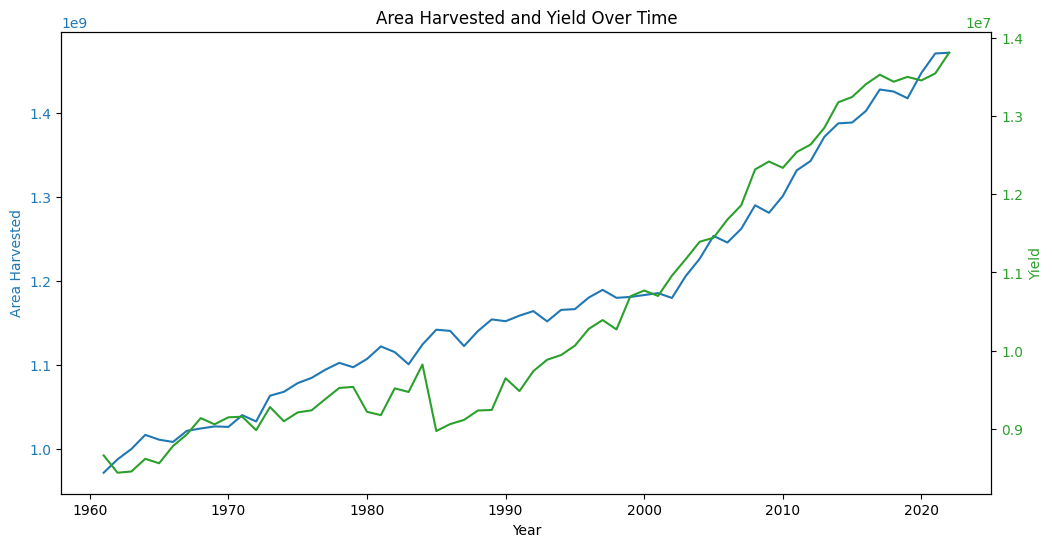

In [116]:
agricultural_data = pd.read_csv('processed-datas/agricultural_data.csv')

ig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Area Harvested', color=color)
ax1.plot(agricultural_data['Year'], agricultural_data['Area harvested'], color=color, label='Area Harvested')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('Yield', color=color)  
ax2.plot(agricultural_data['Year'], agricultural_data['Yield'], color=color, label='Yield')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Area Harvested and Yield Over Time')
plt.show()

### 2. Regression Plot for Gross Production Value and Production Over Time


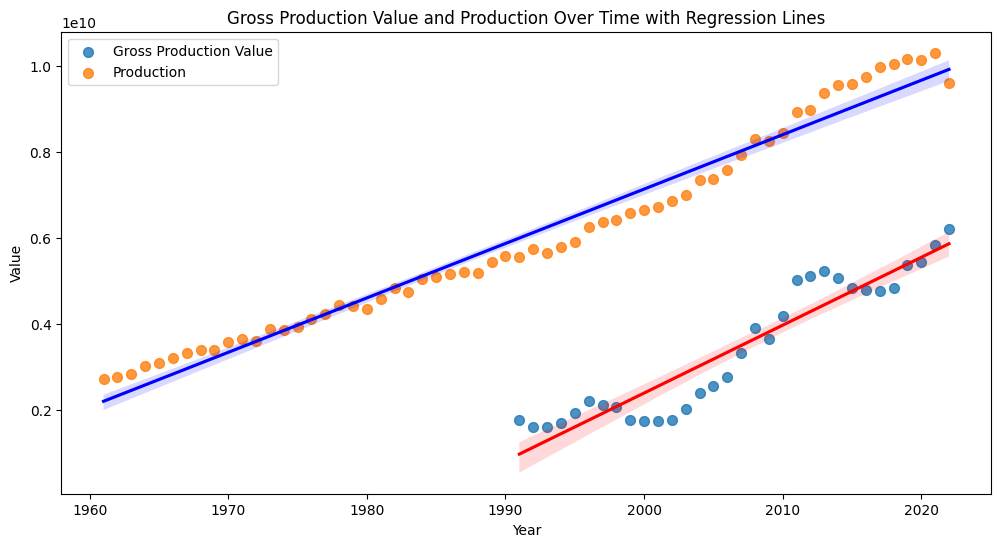

In [117]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Year', y='Gross Production Value (current thousand US$)', data=agricultural_data, label='Gross Production Value', scatter_kws={'s': 50}, line_kws={'color': 'red'})
sns.regplot(x='Year', y='Production', data=agricultural_data, label='Production', scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.title('Gross Production Value and Production Over Time with Regression Lines')
plt.show()


# EDA Stage

## Merging Data

In [118]:
climate_pca_file_path = 'processed-datas/pca_transformed_climate.csv'
economic_data_file_path = 'processed-datas/economic_data.csv'
ghg_data_file_path = 'processed-datas/global_ghg.csv'
health_data_file_path = 'processed-datas/health_data.csv'
agricultural_data_file_path = 'processed-datas/agricultural_data.csv'

climate_pca_data = pd.read_csv(climate_pca_file_path)
economic_data = pd.read_csv(economic_data_file_path)
ghg_data = pd.read_csv(ghg_data_file_path)
health_data = pd.read_csv(health_data_file_path)
agricultural_data = pd.read_csv(agricultural_data_file_path)

merged_data = climate_pca_data.merge(economic_data, on='Year', how='left')
merged_data = merged_data.merge(ghg_data, on='Year', how='left')
merged_data = merged_data.merge(health_data, on='Year', how='left')
merged_data = merged_data.merge(agricultural_data, on='Year', how='left')

output_file_path = 'combined_data.csv'
merged_data.to_csv(output_file_path, index=False)

combined_data = pd.read_csv('combined_data.csv')


## 1. Scatter Plot with Regression Line: GHG Emissions vs. Economic Losses

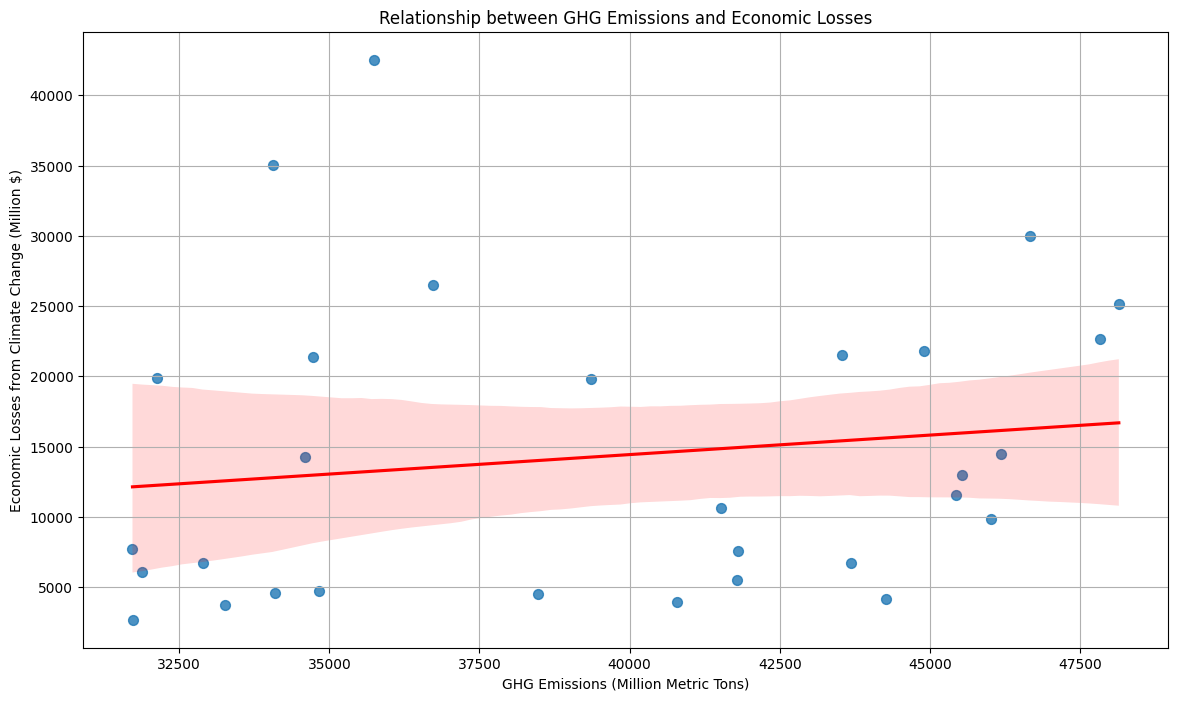

In [119]:
plt.figure(figsize=(14, 8))
sns.regplot(x='GHG_Emission', y='Million_Loss_From_Climate', data=combined_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('GHG Emissions (Million Metric Tons)')
plt.ylabel('Economic Losses from Climate Change (Million $)')
plt.title('Relationship between GHG Emissions and Economic Losses')
plt.grid(True)
plt.show()

## 2. Line Plot: GHG Emissions and Heat-Related Deaths Over Time

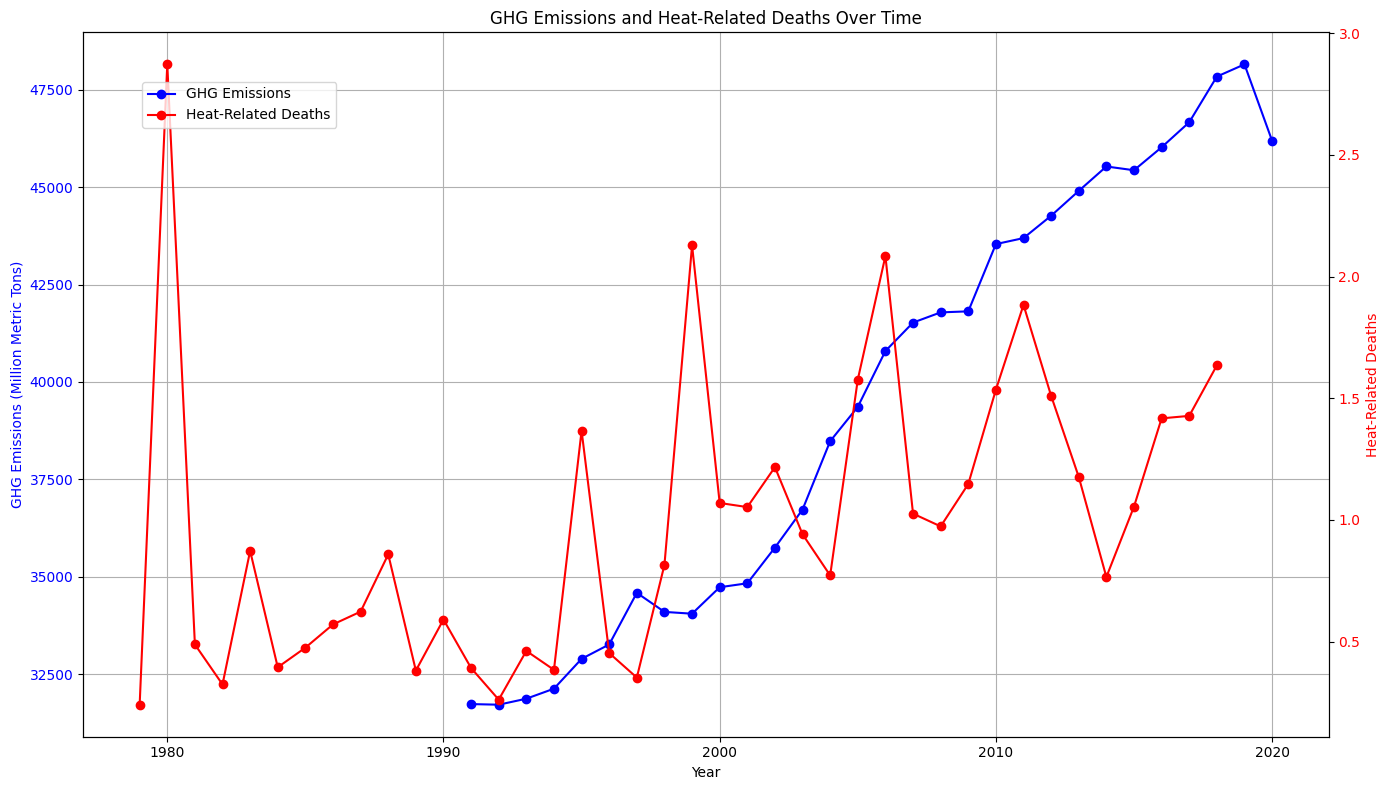

In [120]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(combined_data['Year'], combined_data['GHG_Emission'], color='blue', marker='o', label='GHG Emissions')
ax1.set_xlabel('Year')
ax1.set_ylabel('GHG Emissions (Million Metric Tons)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(combined_data['Year'], combined_data['Heat_Deaths_Underlying'], color='red', marker='o', label='Heat-Related Deaths')
ax2.set_ylabel('Heat-Related Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('GHG Emissions and Heat-Related Deaths Over Time')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()


## 3. Scatter Plot with Color Gradient: GHG Emissions vs. Agricultural Yield


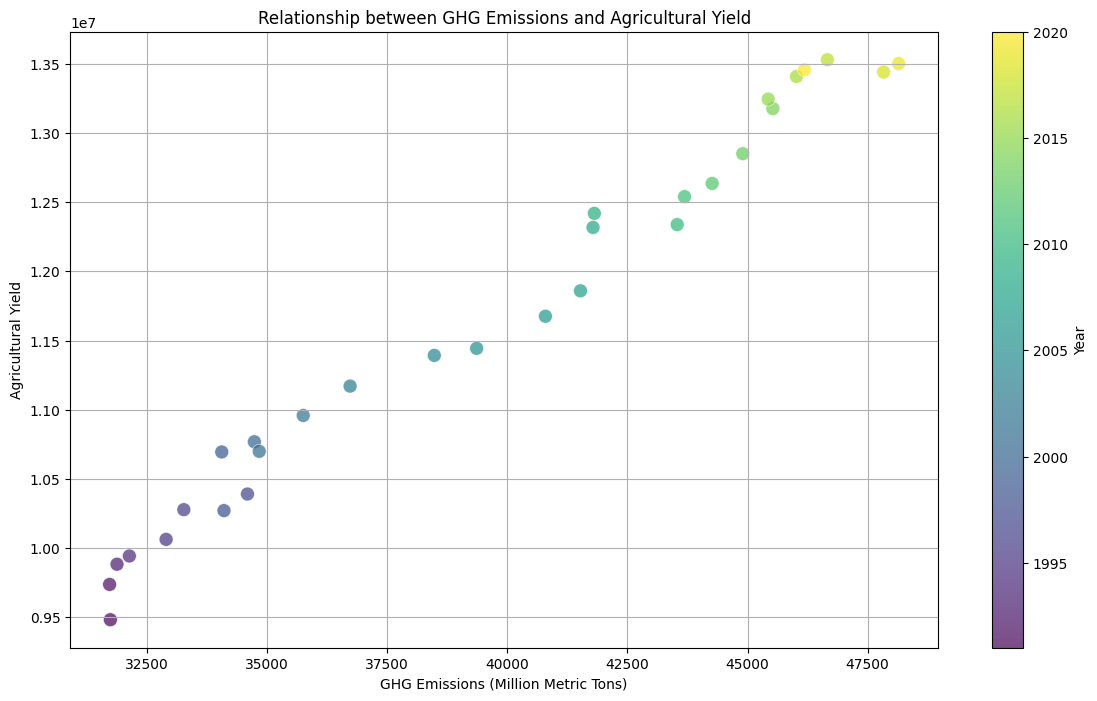

In [121]:
plt.figure(figsize=(14, 8))
sc = plt.scatter(combined_data['GHG_Emission'], combined_data['Yield'], c=combined_data['Year'], cmap='viridis', s=100, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.colorbar(sc, label='Year')
plt.xlabel('GHG Emissions (Million Metric Tons)')
plt.ylabel('Agricultural Yield')
plt.title('Relationship between GHG Emissions and Agricultural Yield')
plt.grid(True)
plt.show()

## 4. Relationship between Summer Electricity Use Per Capita and GHG Emissions


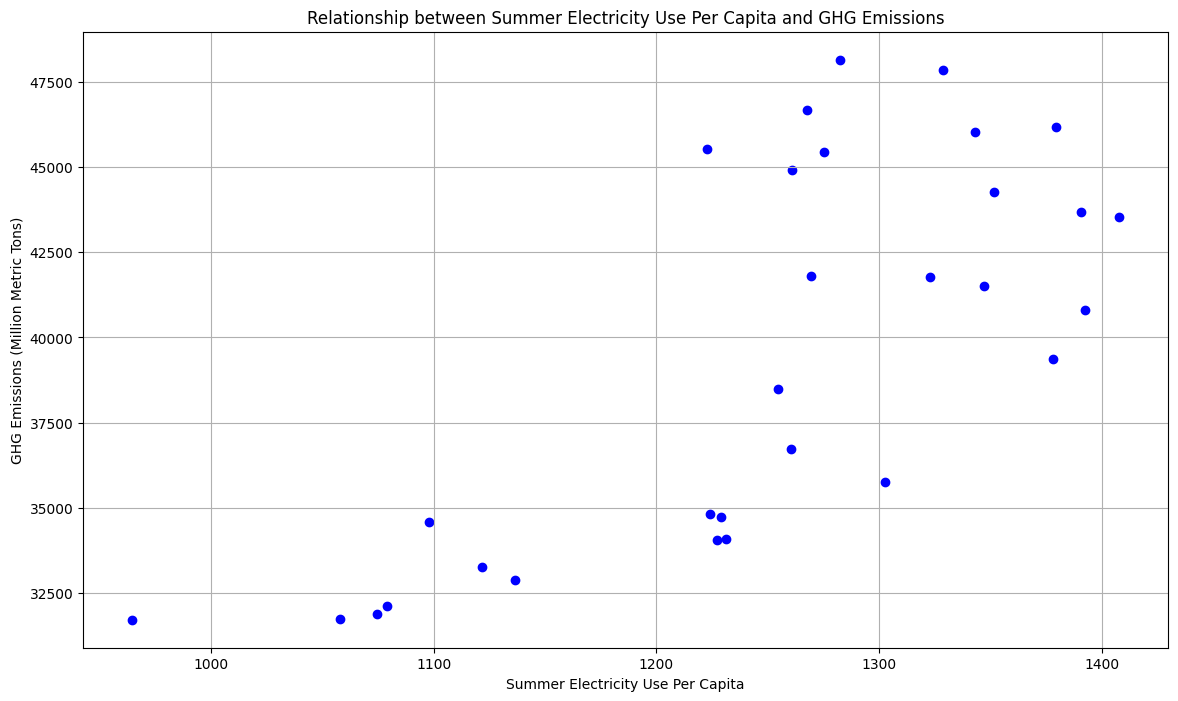

In [122]:
plt.figure(figsize=(14, 8))
plt.scatter(combined_data['Summer electricity use per capita'], combined_data['GHG_Emission'], color='blue')
plt.xlabel('Summer Electricity Use Per Capita')
plt.ylabel('GHG Emissions (Million Metric Tons)')
plt.title('Relationship between Summer Electricity Use Per Capita and GHG Emissions')
plt.grid(True)
plt.show()

## 5. Scatter plot of Area Per Capita and GHG Emissions


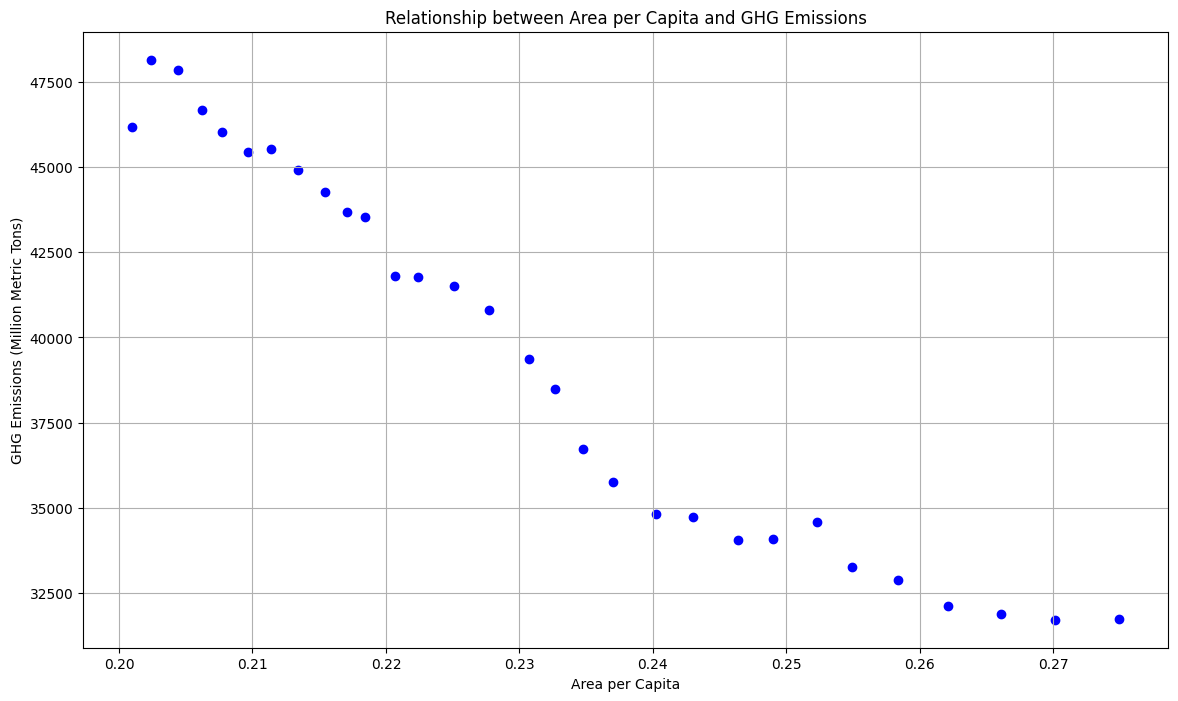

In [123]:
plt.figure(figsize=(14, 8))
plt.scatter(combined_data['Area per capita'], combined_data['GHG_Emission'], color='blue')
plt.xlabel('Area per Capita')
plt.ylabel('GHG Emissions (Million Metric Tons)')
plt.title('Relationship between Area per Capita and GHG Emissions')
plt.grid(True)
plt.show()

# Modeling Stage

In [124]:
combined_data['food_cost'] = combined_data['Gross Production Value (current thousand US$)'] / combined_data['Production']

model_data = combined_data.drop(columns=['Area per capita','Gross Production Value (current thousand US$)','Production','Yield','Area harvested'])

model_data.to_csv('model_data.csv',index=False)

This Python script performs several key tasks related to scaling, training, evaluating, and saving machine learning models for multiple target columns based on PCA-scaled features from a dataset. It starts by reading a CSV file into a pandas DataFrame and then scales the PCA columns to ensure they have mean 0 and standard deviation 1. Separate datasets are created for each target variable by removing rows where the target variable is missing. Three regression models are defined: Linear Regression, Decision Tree Regressor, and Random Forest Regressor. Each model is evaluated using 5-fold cross-validation and the root mean squared error (RMSE) metric. Based on preliminary evaluations, the script tunes the parameters of the best-performing model using GridSearchCV, retrains it on the full dataset, and saves the best model to a joblib file. This comprehensive approach enables the efficient development, tuning, and saving of multiple models tailored to different target variables using PCA features from the dataset.

In [147]:

file_path = 'model_data.csv'
data = pd.read_csv(file_path)

scaler = StandardScaler()
pca_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
data_scaled = data.copy()
data_scaled[pca_columns] = scaler.fit_transform(data[pca_columns])

target_columns = ['Summer electricity use per capita', 'Million_Loss_From_Climate', 
                  'GHG_Emission', 'Heat_Deaths_Underlying', 'Lyme_Incidence', 'food_cost']
datasets = {col: data_scaled[data_scaled[col].notna()] for col in target_columns}

degree = 3
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])

models = {
    "Linear Regression": LinearRegression()
   # "Decision Tree": DecisionTreeRegressor(random_state=666),
    #"Random Forest": RandomForestRegressor(random_state=666),
    #"SVR": SVR(),
    #"XGBoost": XGBRegressor(random_state=666)
    #"Polynomial Regression": poly_model
}

def train_and_evaluate_models(data, target_column):
    X = data[pca_columns] 
    y = data[target_column]  
    
    scores = {}
    for name, model in models.items():
        if isinstance(model, Pipeline):
            
            neg_rmse_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
        else:
            neg_rmse_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
        rmse_scores = -neg_rmse_scores
        scores[name] = np.mean(rmse_scores)
    return scores

def tune_train_save_model(data, target_column, model_name, param_grid):
    X = data[pca_columns]
    y = data[target_column]
    model = models[model_name]

    grid_search = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=1)
    grid_search.fit(X, y)

    best_model = model.set_params(**grid_search.best_params_)
    best_model.fit(X, y)
    
    model_path = f'models/{target_column.replace(" ", "_")}_{model_name.replace(" ", "_")}.joblib'
    dump(best_model, model_path)
    print(f"Model saved for {target_column}: {model_path}")
    
    return grid_search.best_params_, -grid_search.best_score_

param_grids = {
    "Linear Regression": {} 
    #"Decision Tree": {
    #    'max_depth': [None, 10, 20, 30],
    #    'min_samples_split': [2, 5, 10],
    #    'min_samples_leaf': [1, 2, 4]
    #},
    #"Random Forest": {
    #    'n_estimators': [50, 100, 200],
    #    'max_depth': [None, 10, 20, 30],
    #    'min_samples_split': [2, 5, 10]
    #},
    #"SVR": {
    #    'C': [0.1, 1, 10], 
    #    'kernel': ['linear', 'poly', 'rbf'],
    #    'gamma': ['scale', 'auto']
    #},
    #"XGBoost": {
    #    'n_estimators': [50, 100, 200],
    #    'max_depth': [3, 5, 7, 9],
    #    'learning_rate': [0.01, 0.1, 0.2],
    #    'subsample': [0.8, 1]
    #}
}
#param_grids['Polynomial Regression'] = {
 #   'poly__degree': [2, 3, 5, 7]  # You can try different degrees to see which works best
#}

for target in target_columns:
    scores = train_and_evaluate_models(datasets[target], target)
    best_model_name = min(scores, key=scores.get)
    param_grid = param_grids[best_model_name]
    best_params, best_score = tune_train_save_model(datasets[target], target, best_model_name, param_grid)
    print(f"Best parameters for {target}: {best_params}")
    print(f"Best RMSE for {target}: {best_score}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Model saved for Summer electricity use per capita: models/Summer_electricity_use_per_capita_Linear_Regression.joblib
Best parameters for Summer electricity use per capita: {}
Best RMSE for Summer electricity use per capita: 190.18846311297432
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Model saved for Million_Loss_From_Climate: models/Million_Loss_From_Climate_Linear_Regression.joblib
Best parameters for Million_Loss_From_Climate: {}
Best RMSE for Million_Loss_From_Climate: 12980.800133601708
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Model saved for GHG_Emission: models/GHG_Emission_Linear_Regression.joblib
Best parameters for GHG_Emission: {}
Best RMSE for GHG_Emission: 3755.054741627368
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Model saved for Heat_Deaths_Underlying: models/Heat_Deaths_Underlying_Linear_Regression.joblib
Best parameters for Heat_Deaths_Underlying: {}
Best RMSE 

This script processes PCA-transformed climate data, predicts future PCA values using linear regression, and saves these predictions. It begins by loading a CSV file containing PCA-transformed data into a pandas DataFrame. The script then defines a function to predict future PCA component values based on linear trends observed in the data, using the year as the predictor variable. It fits a linear regression model for each PCA component against the year and uses the model to predict values for future years, extending up to 2050.

An array of future years is prepared, and predictions are stored for each PCA component ('PC1' through 'PC5'). These predictions are compiled into a new DataFrame that includes the future years and the predicted PCA values for each component. Finally, the script saves this DataFrame to a CSV file, providing a structured output of future PCA values based on current and historical data trends. This approach facilitates forecasting based on linear trends in PCA components, which might represent underlying patterns in climate-related data.

In [144]:

file_path_pca = 'processed-datas/pca_transformed_climate.csv'
pca_data = pd.read_csv(file_path_pca)

def predict_pca_future(pca_data, component, future_years):
    model = LinearRegression()
    X = pca_data[['Year']]
    y = pca_data[component]
    model.fit(X, y)
    future_predictions = model.predict(future_years)
    return future_predictions

future_years = np.arange(pca_data['Year'].max() + 1, 2051).reshape(-1, 1)

future_predictions = {}
for component in ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']:
    future_predictions[component] = predict_pca_future(pca_data, component, future_years)

future_pca_df = pd.DataFrame(future_years, columns=['Year'])
for component in future_predictions:
    future_pca_df[component] = future_predictions[component]

output_path = 'future_pca_values.csv'
future_pca_df.to_csv(output_path, index=False)
print(f"Future PCA values saved to {output_path}")

Future PCA values saved to future_pca_values.csv


c:\Users\enekeskin\Desktop\itudsproject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\enekeskin\Desktop\itudsproject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\enekeskin\Desktop\itudsproject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\enekeskin\Desktop\itudsproject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\enekeskin\Desktop\itudsproject\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  

This script loads previously trained machine learning models and uses them to make predictions on future PCA values for various climate-related targets up to the year 2050. It starts by defining paths to the saved models for different targets such as 'Summer electricity use per capita' and 'GHG Emission'. The script then loads a dataset containing future PCA values from a CSV file. These PCA values serve as input features for the models.

An array of future years is prepared, and the script initializes a DataFrame to store these years along with the predicted values for each target. For each target variable, the corresponding model is loaded, and predictions are made using the future PCA values. These predictions are stored in a DataFrame, which organizes the results by year and target variable, making it easy to review and analyze the projected impacts.

Finally, the script saves the predictions to a CSV file, providing a comprehensive outlook on future climate-related metrics based on the patterns learned from historical and projected PCA data. This method enables stakeholders to anticipate and plan for potential impacts in various areas such as public health, economic losses due to climate events, and changes in energy usage.

In [145]:

models_paths = {
    #'Summer electricity use per capita': 'models/Summer_electricity_use_per_capita_Random_Forest.joblib',
    #'Million_Loss_From_Climate': 'models/Million_Loss_From_Climate_Linear_Regression.joblib',
    #'GHG_Emission': 'models/GHG_Emission_Linear_Regression.joblib',
    #'Heat_Deaths_Underlying': 'models/Heat_Deaths_Underlying_Random_Forest.joblib',
    #'Lyme_Incidence': 'models/Lyme_Incidence_Random_Forest.joblib',
    #'food_cost': 'models/food_cost_Linear_Regression.joblib'
    'Summer electricity use per capita': 'models/Summer_electricity_use_per_capita_Linear_Regression.joblib',
    'Million_Loss_From_Climate': 'models/Million_Loss_From_Climate_Linear_Regression.joblib',
    'GHG_Emission': 'models/GHG_Emission_Linear_Regression.joblib',
    'Heat_Deaths_Underlying': 'models/Heat_Deaths_Underlying_Linear_Regression.joblib',
    'Lyme_Incidence': 'models/Lyme_Incidence_Linear_Regression.joblib',
    'food_cost': 'models/food_cost_Linear_Regression.joblib'
}

future_pca_path = 'future_pca_values.csv'
future_pca_df = pd.read_csv(future_pca_path)

pca_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
X_future = future_pca_df[pca_columns]

predictions_df = pd.DataFrame(future_pca_df['Year'], columns=['Year'])

for target, model_path in models_paths.items():
    model = load(model_path)
    predictions = model.predict(X_future)
    predictions_df[target] = predictions

predictions_output_path = 'predictions_until_2050.csv'
predictions_df.to_csv(predictions_output_path, index=False)
print(f"All predictions saved to {predictions_output_path}")

All predictions saved to predictions_until_2050.csv


# Final Visualizations

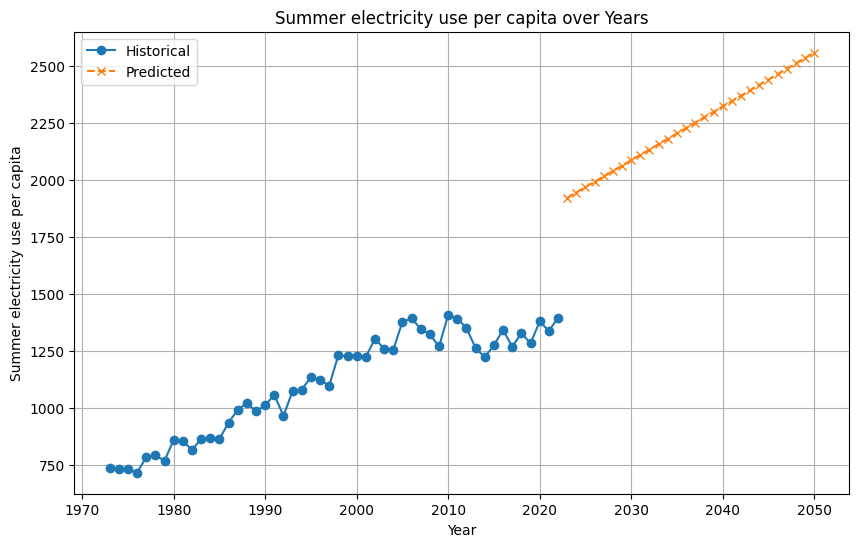

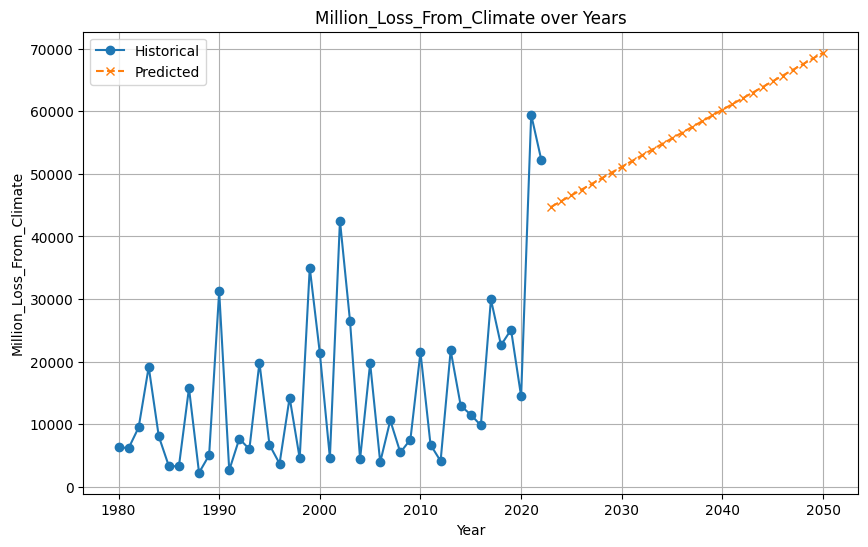

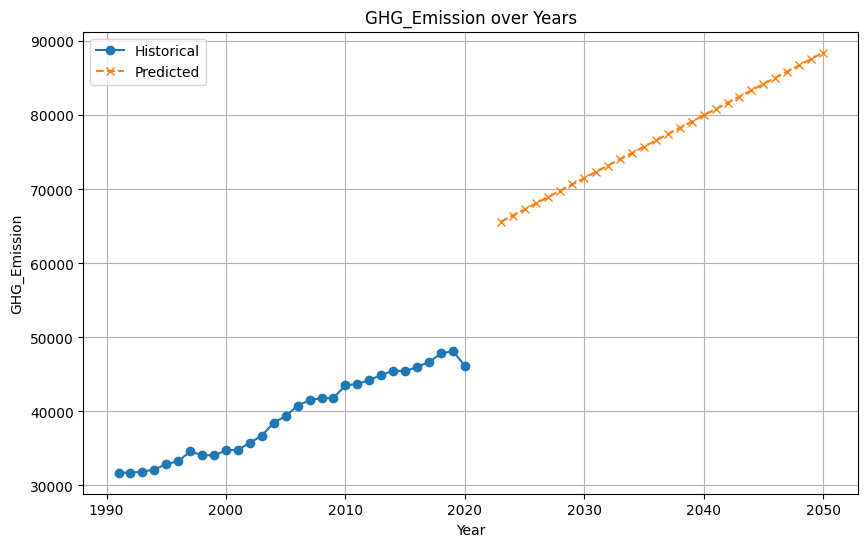

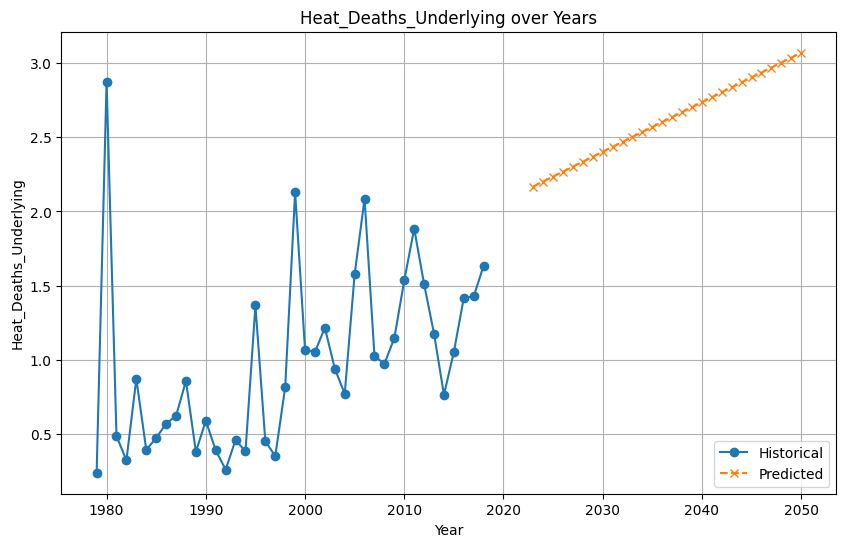

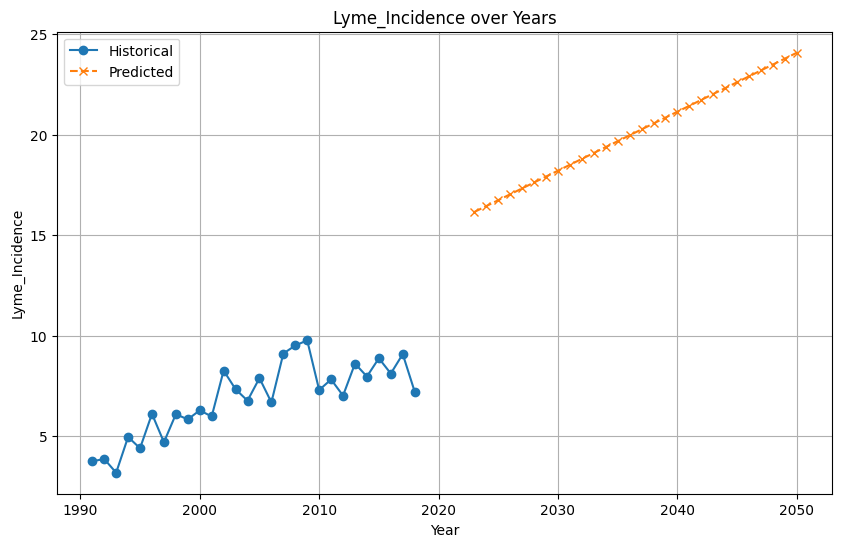

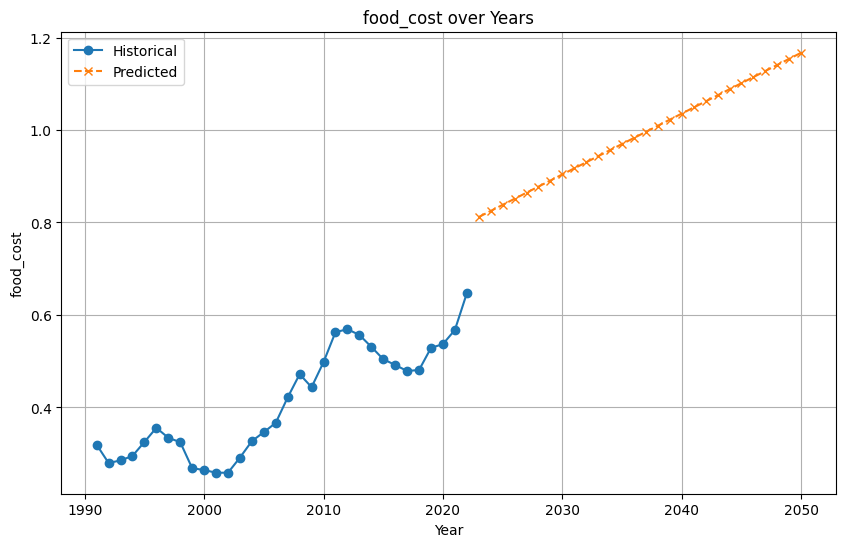

In [146]:

model_data_path = 'model_data.csv'
predictions_path = 'predictions_until_2050.csv'

model_data = pd.read_csv(model_data_path)
predictions_data = pd.read_csv(predictions_path)

merged_data = pd.merge(model_data, predictions_data, on='Year', how='outer')

historical_columns = [
    'Summer electricity use per capita_x', 'Million_Loss_From_Climate_x', 
    'GHG_Emission_x', 'Heat_Deaths_Underlying_x', 'Lyme_Incidence_x', 'food_cost_x'
]

predicted_columns = [
    'Summer electricity use per capita_y', 'Million_Loss_From_Climate_y', 
    'GHG_Emission_y', 'Heat_Deaths_Underlying_y', 'Lyme_Incidence_y', 'food_cost_y'
]

for hist_col, pred_col in zip(historical_columns, predicted_columns):
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['Year'], merged_data[hist_col], marker='o', label='Historical')
    plt.plot(merged_data['Year'], merged_data[pred_col], marker='x', linestyle='--', label='Predicted')
    plt.xlabel('Year')
    plt.ylabel(hist_col.replace('_x', ''))
    plt.title(f'{hist_col.replace("_x", "")} over Years')
    plt.legend()
    plt.grid(True)
    plt.show()

# RESULTS

Hello Professor Atabey, we have tried tuning multiple models, but due to the nature of our topic, the data is on an annual basis, which limited our access to a large dataset. The models we tuned did not produce realistic results, but linear regression at least helped us predict future increases. Therefore, we are concluding our chosen topic with graphs illustrating potential future challenges such as increased emissions, rising food costs, the intensification of diseases in warmer climates, and rising economic expenses. Thank you.